
# **Electric Vehicle Charging Patterns**



This dataset provides a comprehensive analysis of electric vehicle (EV) charging patterns and user behavior. It contains 1,320 samples of charging session data, including metrics such as energy consumption, charging duration, and vehicle details. Each entry captures various aspects of EV usage, allowing for insightful analysis and predictive modeling.

Key Features:

User ID: Unique identifier for each user.

Vehicle Model: Model of the electric vehicle being charged (e.g., Tesla Model 3, Nissan Leaf).

Battery Capacity (kWh): Total battery capacity of the vehicle in kilowatt-hours.

Charging Station ID: Unique identifier for the charging station used.

Charging Station Location: Geographic location of the charging station (e.g., New York, Los Angeles).

Charging Start Time: Timestamp indicating when the charging session began.

Charging End Time: Timestamp indicating when the charging session ended.

Energy Consumed (kWh): Total energy consumed during the charging session, measured in kilowatt-hours.

Charging Duration (hours):Total time taken to charge the vehicle, measured in hours.

Charging Rate (kW): Average power delivery rate during the charging session, measured in kilowatts.

Charging Cost (USD): Total cost incurred for the charging session, measured in US dollars.

Time of Day: Time segment when the charging occurred (e.g., Morning, Afternoon).

Day of Week: Day of the week when the charging occurred (e.g., Monday, Tuesday).

State of Charge (Start %): Battery charge percentage at the start of the charging session.

State of Charge (End %): Battery charge percentage at the end of the charging session.

Distance Driven (since last charge) (km): Distance traveled since the last charging session, measured in kilometers.

Temperature (°C): Ambient temperature during the charging session, measured in degrees Celsius.

Vehicle Age (years): Age of the electric vehicle, measured in years.
Charger Type: Type of charger used (e.g., Level 1, Level 2, DC Fast Charger).

User Type: Classification of user based on driving habits (e.g., Commuter, Long-Distance Traveler).

# Data Types in the EV Charging Dataset



1.   Categorical Data:

*   Vehicle Model
*   User Type
*   Charger Type
*   User ID
*   Charging Station ID
*   Charging Station Location





2.   Continuous Data:


*   Energy Consumed (kWh)
*   Charging Duration (hours)
*   Charging Cost (USD)
*   Battery Capacity (kWh)
*   Charging Rate (kW)
*   State of Charge (Start %)
*   State of Charge (End %)
*   Distance Driven (since last charge) (km)
*   Temperature (°C)
*   Vehicle Age (years)


3.   Temporal Data:


*   Charging Start Time
*   Charging End Time
*   Day of the Week
*   Time of Day








# Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# About Data

In [ ]:
df = pd.read_csv('ev_charging_patterns.csv')

In [ ]:
df.head()

User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
0  User_1        BMW i3              108.463007         Station_391   
1  User_2  Hyundai Kona              100.000000         Station_428   
2  User_3    Chevy Bolt               75.000000         Station_181   
3  User_4  Hyundai Kona               50.000000         Station_327   
4  User_5  Hyundai Kona               50.000000         Station_108   

  Charging Station Location  Charging Start Time    Charging End Time  \
0                   Houston  2024-01-01 00:00:00  2024-01-01 00:39:00   
1             San Francisco  2024-01-01 01:00:00  2024-01-01 03:01:00   
2             San Francisco  2024-01-01 02:00:00  2024-01-01 04:48:00   
3                   Houston  2024-01-01 03:00:00  2024-01-01 06:42:00   
4               Los Angeles  2024-01-01 04:00:00  2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              60.712346                   0.591363           36.389181   
1              12.339275                   3.133652           30.677735   
2              19.128876                   2.452653           27.513593   
3              79.457824                   1.266431           32.882870   
4              19.629104                   2.019765           10.215712   

   Charging Cost (USD) Time of Day Day of Week  State of Charge (Start %)  \
0            13.087717     Evening     Tuesday                  29.371576   
1            21.128448     Morning      Monday                  10.115778   
2            35.667270     Morning    Thursday                   6.854604   
3            13.036239     Evening    Saturday                  83.120003   
4            10.161471     Morning    Saturday                  54.258950   

   State of Charge (End %)  Distance Driven (since last charge) (km)  \
0                86.119962                                293.602111   
1                84.664344                                112.112804   
2                69.917615                                 71.799253   
3                99.624328                                199.577785   
4                63.743786                                203.661847   

   Temperature (°C)  Vehicle Age (years)     Charger Type  \
0         27.947953                  2.0  DC Fast Charger   
1         14.311026                  3.0          Level 1   
2         21.002002                  2.0          Level 2   
3         38.316313                  1.0          Level 1   
4         -7.834199                  1.0          Level 1   

                User Type  
0                Commuter  
1           Casual Driver  
2                Commuter  
3  Long-Distance Traveler  
4  Long-Distance Traveler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

# Data Quality

Missing values

Missing Values:
 Energy Consumed (kWh)                       66
Charging Rate (kW)                          66
Distance Driven (since last charge) (km)    66
dtype: int64


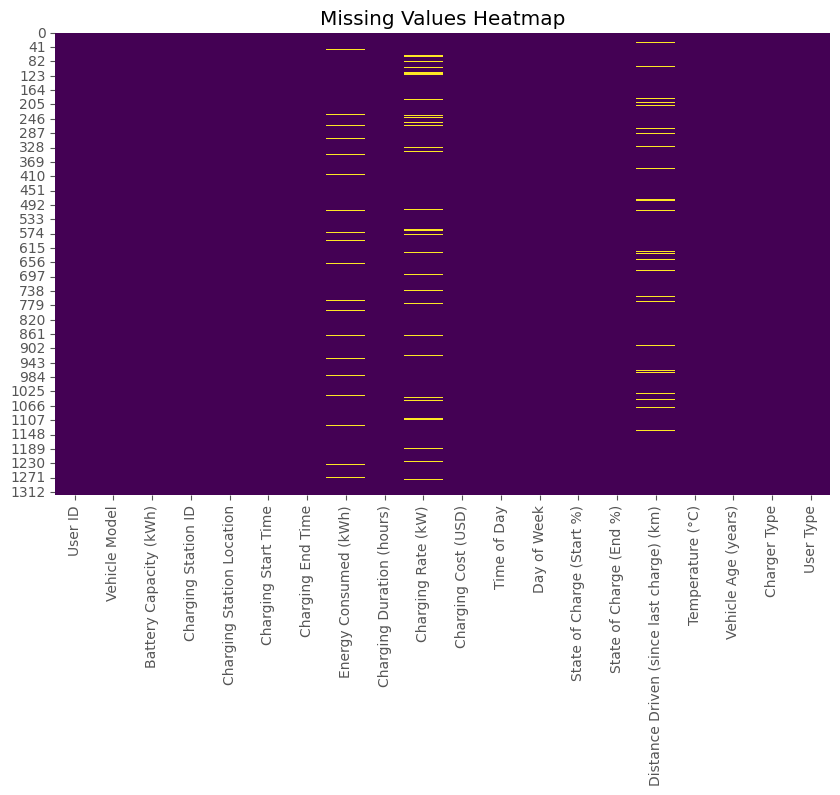

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()





Identify Outliers

In [ ]:
outliers_zscore = {}

# List of continuous columns
continuous_columns = ['Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Cost (USD)',
                      'Battery Capacity (kWh)', 'Charging Rate (kW)', 'State of Charge (Start %)',
                      'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
                      'Temperature (°C)', 'Vehicle Age (years)']

for column in continuous_columns:
    # Calculate Z-scores without adding them as new columns to the dataframe
    z_scores = zscore(df[column])

    # Identify rows where Z-score is greater than 3 or less than -3
    outliers = df[np.abs(z_scores) > 3]

    # Store outliers
    outliers_zscore[column] = outliers[[column]]

    # Print outliers for the current column
    print(f"Outliers in {column}:\n", outliers[[column]])


Outliers in Energy Consumed (kWh):
 Empty DataFrame
Columns: [Energy Consumed (kWh)]
Index: []
Outliers in Charging Duration (hours):
       Charging Duration (hours)
387                    6.176417
624                    6.494007
772                    6.759152
848                    5.945571
903                    5.673789
924                    6.773095
1032                   7.635145
1036                   5.505496
Outliers in Charging Cost (USD):
       Charging Cost (USD)
247             68.931688
438             54.892983
517             69.407743
791             58.746677
929             60.402525
1234            58.254607
Outliers in Battery Capacity (kWh):
       Battery Capacity (kWh)
107               147.395354
264               143.475210
269                10.189287
332                 6.168896
430                 3.976596
435                 1.532807
478                 3.838518
513               174.409668
618                 1.536540
668                 5.189530
707  

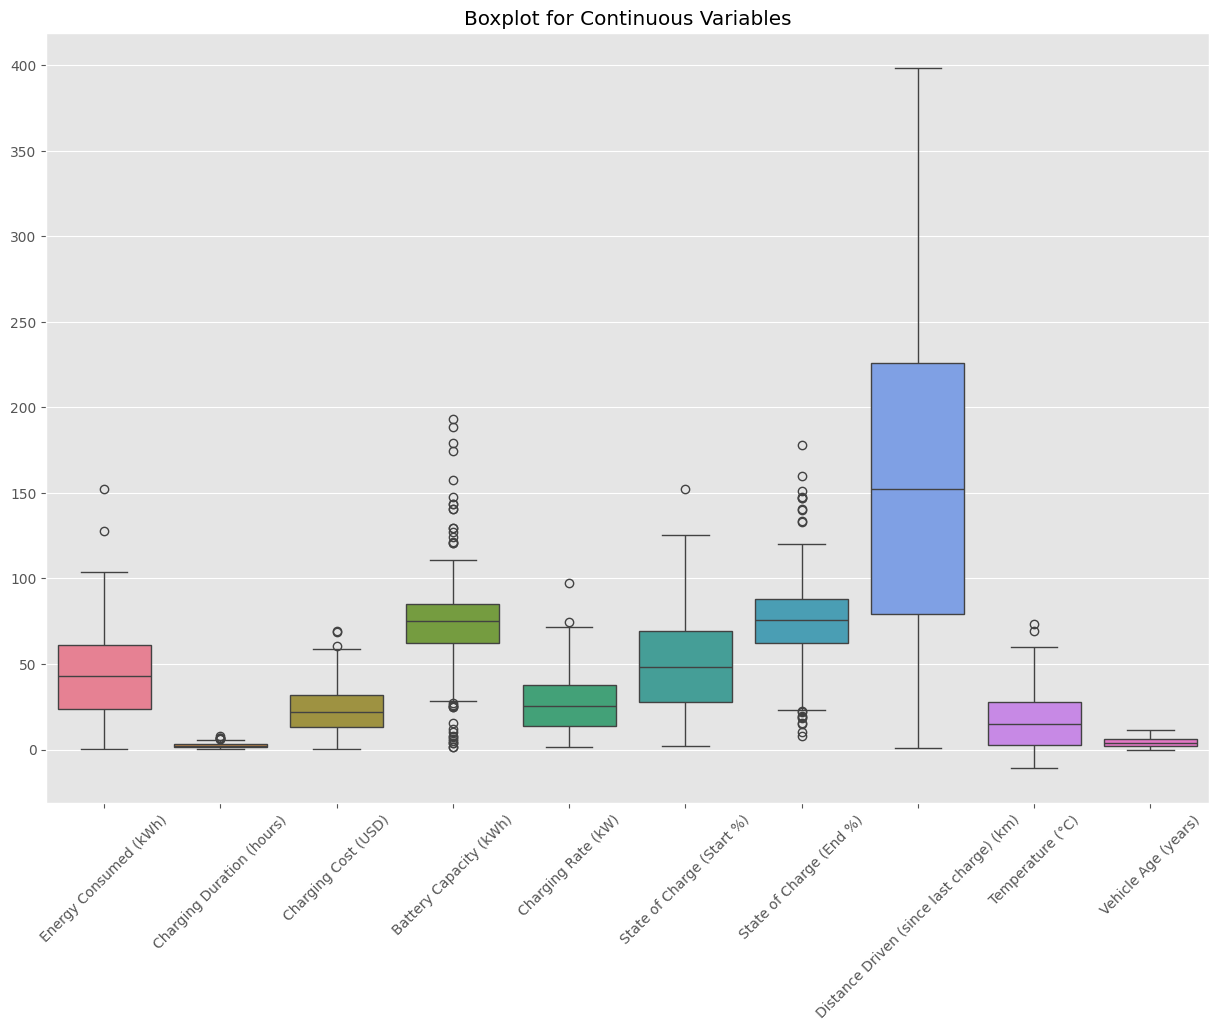

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[continuous_columns])
plt.title("Boxplot for Continuous Variables")
plt.xticks(rotation=45)
plt.show()

Inconsistencies

In [ ]:
# Example: Checking unique values for categorical columns
print("Unique values in Vehicle Model:\n", df['Vehicle Model'].unique())
print("Unique values in User Type:\n", df['User Type'].unique())

# Standardize text data (e.g., handling case sensitivity)
df['User Type'] = df['User Type'].str.lower()  # Convert to lowercase for consistency

# Ensure timestamp columns are in the correct format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'], errors='coerce')
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'], errors='coerce')


Unique values in Vehicle Model:
 ['BMW i3' 'Hyundai Kona' 'Chevy Bolt' 'Nissan Leaf' 'Tesla Model 3']
Unique values in User Type:
 ['Commuter' 'Casual Driver' 'Long-Distance Traveler']


skewness And Kurtosis

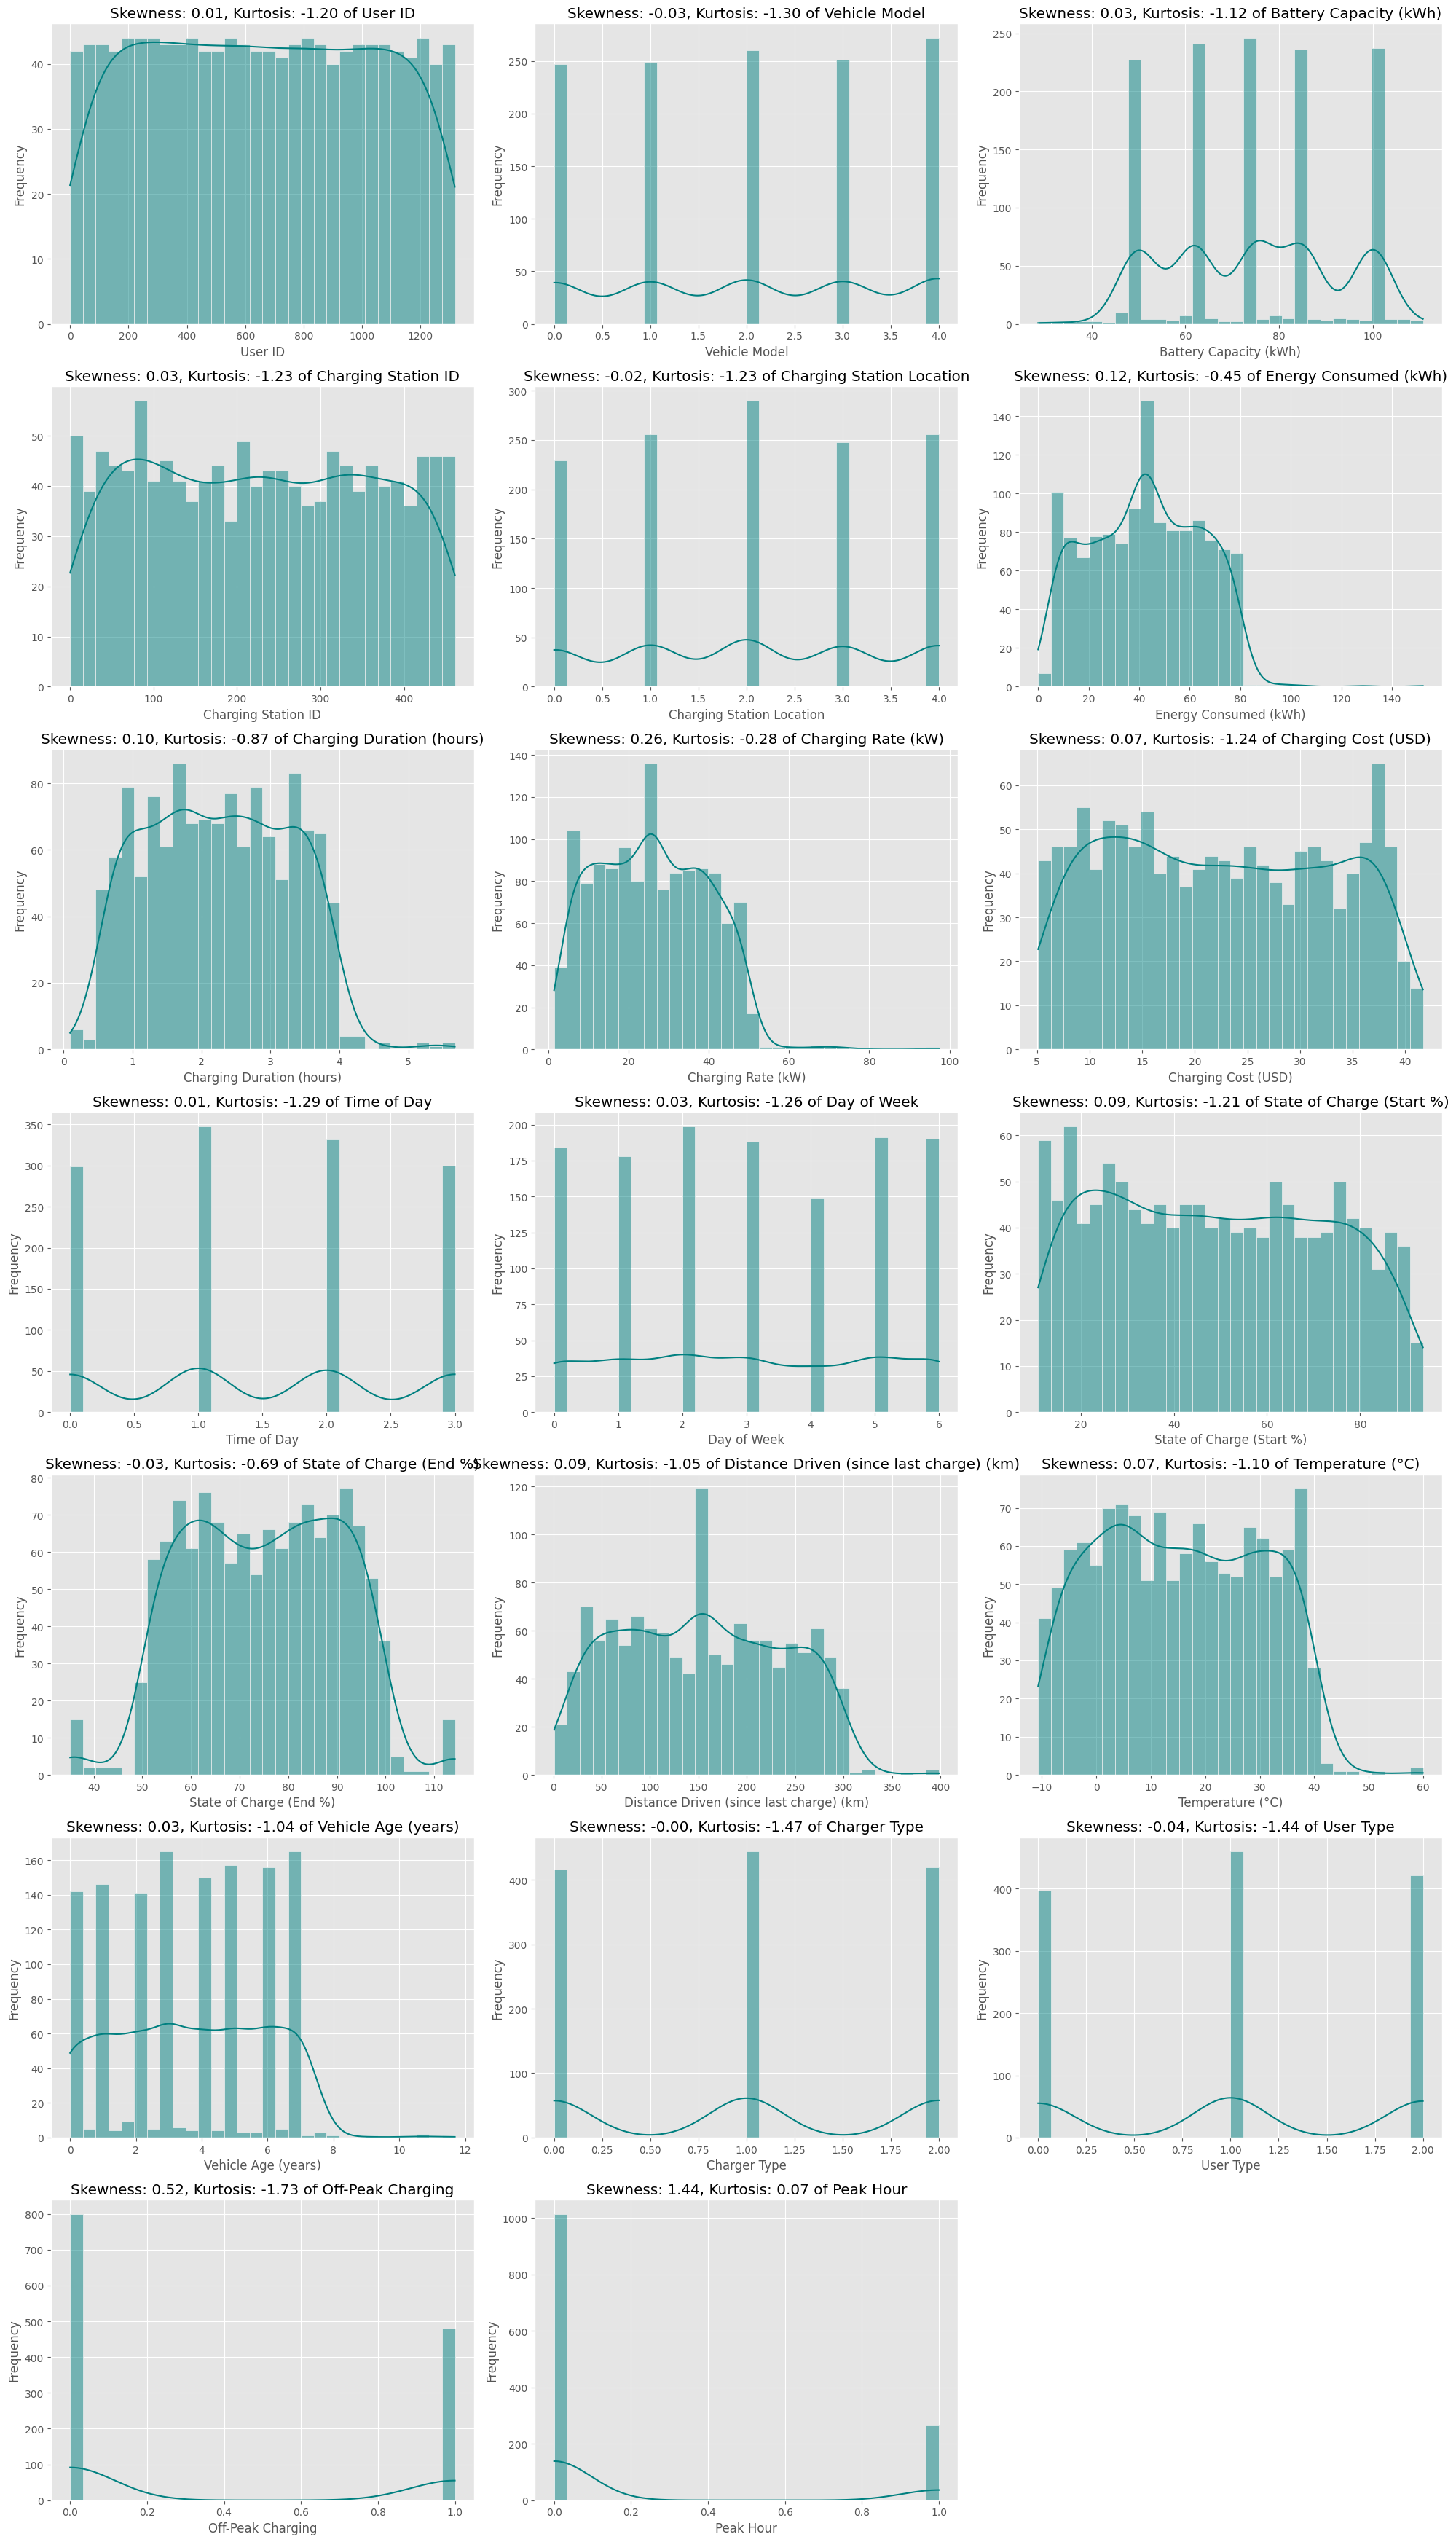

In [ ]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # Calculate the number of rows needed

plt.figure(figsize=(20, num_rows * 5))  # Adjust figure size based on number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Create subplots with dynamic grid size
    sns.histplot(df[column], kde=True, color='teal', bins=30)

    # Calculate skewness and kurtosis
    skew_value = stats.skew(df[column], nan_policy='omit')
    kurt_value = stats.kurtosis(df[column], nan_policy='omit')

    # Add both skewness and kurtosis in the title
    plt.title(f'Skewness: {skew_value:.2f}, Kurtosis: {kurt_value:.2f} of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Data Cleaning

Encoding

In [ ]:


# Initialize the LabelEncoder
le = LabelEncoder()

# Loop through all columns that are of 'object' type (categorical columns)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Now all categorical columns in your DataFrame are label encoded


Duplicates

In [ ]:
df.duplicates()

In [ ]:
# Get median values only for numeric columns
numeric_medians = df.select_dtypes(include='number').median()

# Display the median values for each numeric column
print("Median values for numeric columns:")
print(numeric_medians)


Median values for numeric columns:
User ID                                     659.500000
Vehicle Model                                 2.000000
Battery Capacity (kWh)                       75.000000
Charging Station ID                         227.000000
Charging Station Location                     2.000000
Energy Consumed (kWh)                        42.691405
Charging Duration (hours)                     2.258136
Charging Rate (kW)                           25.603799
Charging Cost (USD)                          22.076360
Time of Day                                   1.000000
Day of Week                                   3.000000
State of Charge (Start %)                    48.241771
State of Charge (End %)                      75.682496
Distance Driven (since last charge) (km)    152.259867
Temperature (°C)                             14.630846
Vehicle Age (years)                           4.000000
Charger Type                                  1.000000
User Type                     

Handling Missing Values

In [ ]:
df['Energy Consumed (kWh)'] = df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].median())


In [ ]:
df['Charging Rate (kW)'] = df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].median())


In [ ]:
df['Distance Driven (since last charge) (km)'] = df['Distance Driven (since last charge) (km)'].fillna(df['Distance Driven (since last charge) (km)'].median())

Handling Outliers

In [ ]:
# Import necessary libraries
import numpy as np

# 1. Remove Outliers Using IQR for Charging Duration (hours)
Q1 = df['Charging Duration (hours)'].quantile(0.25)
Q3 = df['Charging Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Charging Duration (hours)'] >= (Q1 - 1.5 * IQR)) & (df['Charging Duration (hours)'] <= (Q3 + 1.5 * IQR))]

# 2. Cap Outliers for Charging Cost (USD) at 1st and 99th Percentile
lower_bound = df['Charging Cost (USD)'].quantile(0.01)
upper_bound = df['Charging Cost (USD)'].quantile(0.99)
df['Charging Cost (USD)'] = df['Charging Cost (USD)'].clip(lower_bound, upper_bound)

# 3. IQR-Based Removal for Battery Capacity (kWh)
Q1 = df['Battery Capacity (kWh)'].quantile(0.25)
Q3 = df['Battery Capacity (kWh)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Battery Capacity (kWh)'] >= (Q1 - 1.5 * IQR)) & (df['Battery Capacity (kWh)'] <= (Q3 + 1.5 * IQR))]

# 4. Cap Outliers for State of Charge (Start %) and State of Charge (End %) at the 1st and 99th Percentiles
for column in ['State of Charge (Start %)', 'State of Charge (End %)']:
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = df[column].clip(lower_bound, upper_bound)

# 5. Remove Outliers Using IQR for Temperature (°C)
Q1 = df['Temperature (°C)'].quantile(0.25)
Q3 = df['Temperature (°C)'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Temperature (°C)'] >= (Q1 - 1.5 * IQR)) & (df['Temperature (°C)'] <= (Q3 + 1.5 * IQR))]

# Final Dataset after Outlier Treatment
print("Data after handling outliers:\n", df.head())


Data after handling outliers:
    User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
0        0              0              108.463007                  301   
1      432              2              100.000000                  339   
2      543              1               75.000000                   83   
3      654              2               50.000000                  232   
4      765              2               50.000000                    9   

   Charging Station Location Charging Start Time   Charging End Time  \
0                          1 2024-01-01 00:00:00 2024-01-01 00:39:00   
1                          4 2024-01-01 01:00:00 2024-01-01 03:01:00   
2                          4 2024-01-01 02:00:00 2024-01-01 04:48:00   
3                          1 2024-01-01 03:00:00 2024-01-01 06:42:00   
4                          2 2024-01-01 04:00:00 2024-01-01 05:46:00   

   Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  \
0              6

<ipython-input-84-37fdc5d95625>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Charging Cost (USD)'] = df['Charging Cost (USD)'].clip(lower_bound, upper_bound)


Verification

In [ ]:
print("Data Summary:\n", df.describe())
print("Remaining Missing Values:\n", df.isnull().sum())

Data Summary:
            User ID  Vehicle Model  Battery Capacity (kWh)  \
count  1279.000000    1279.000000             1279.000000   
mean    655.948397       2.040657               74.369362   
min       0.000000       0.000000               28.592176   
25%     325.500000       1.000000               62.000000   
50%     653.000000       2.000000               75.000000   
75%     985.500000       3.000000               85.000000   
max    1318.000000       4.000000              110.658128   
std     380.519214       1.419153               17.692010   

       Charging Station ID  Charging Station Location  \
count          1279.000000                1279.000000   
mean            227.827991                   2.035966   
min               0.000000                   0.000000   
25%             107.000000                   1.000000   
50%             228.000000                   2.000000   
75%             345.000000                   3.000000   
max             461.000000          

In [ ]:
print(df['Vehicle Model'].unique())


[0 2 1 3 4]


In [ ]:
print(df['Vehicle Model'].value_counts())


Vehicle Model
4    272
2    260
3    251
1    249
0    247
Name: count, dtype: int64


# Hypothesis

Charging cost is highest during peak times of the day.

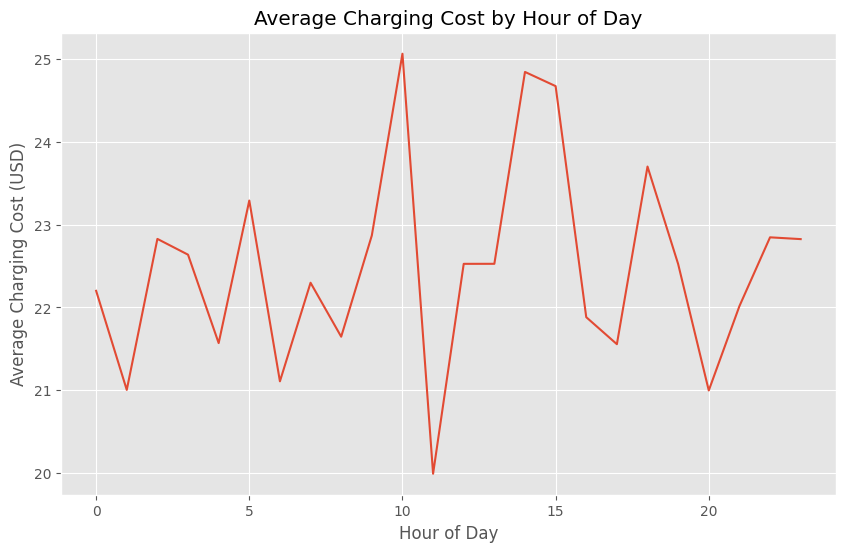

In [ ]:
#Descriptive Analysis Convert Charging Start Time to datetime if it's not already in that format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract the hour of the day from the charging start time
df['Charging Hour'] = df['Charging Start Time'].dt.hour

# Group by hour and calculate the average charging cost for each hour
charging_cost_by_hour = df.groupby('Charging Hour')['Charging Cost (USD)'].mean().reset_index()

# Plot the charging cost throughout the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='Charging Hour', y='Charging Cost (USD)', data=charging_cost_by_hour)
plt.title('Average Charging Cost by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Charging Cost (USD)')
plt.show()


There is a positive correlation between the distance driven since the last charge and the energy consumed during charging.

Correlation between Distance Driven and Energy Consumed: -0.027615753751168


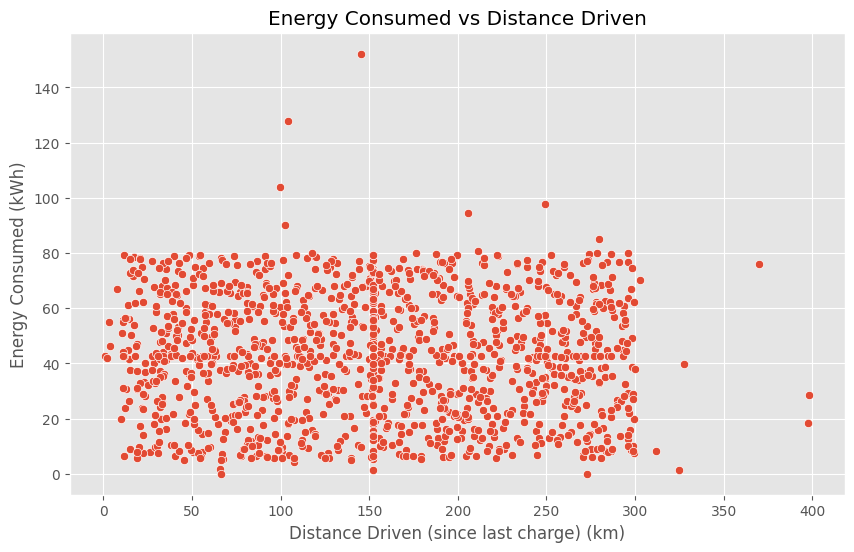

In [ ]:
# Calculate correlation between distance driven since last charge and energy consumed
correlation = df[['Distance Driven (since last charge) (km)', 'Energy Consumed (kWh)']].corr()

# Print the correlation coefficient
print("Correlation between Distance Driven and Energy Consumed:", correlation.iloc[0, 1])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Driven (since last charge) (km)', y='Energy Consumed (kWh)', data=df)
plt.title('Energy Consumed vs Distance Driven')
plt.xlabel('Distance Driven (since last charge) (km)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()


Charging duration increases with the size of the battery

Correlation between Battery Capacity and Charging Duration: -0.04272164082576249


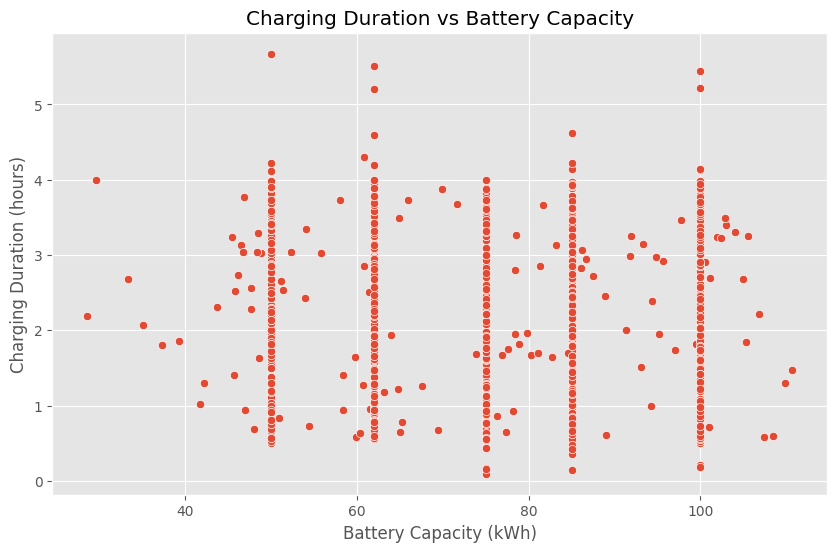

In [ ]:
# Calculate the correlation between battery capacity and charging duration
correlation = df[['Battery Capacity (kWh)', 'Charging Duration (hours)']].corr()

# Print the correlation coefficient
print("Correlation between Battery Capacity and Charging Duration:", correlation.iloc[0, 1])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity (kWh)', y='Charging Duration (hours)', data=df)
plt.title('Charging Duration vs Battery Capacity')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.show()


Charging cost increases in colder temperatures.

Correlation between Temperature and Charging Cost: 0.043653377694581275


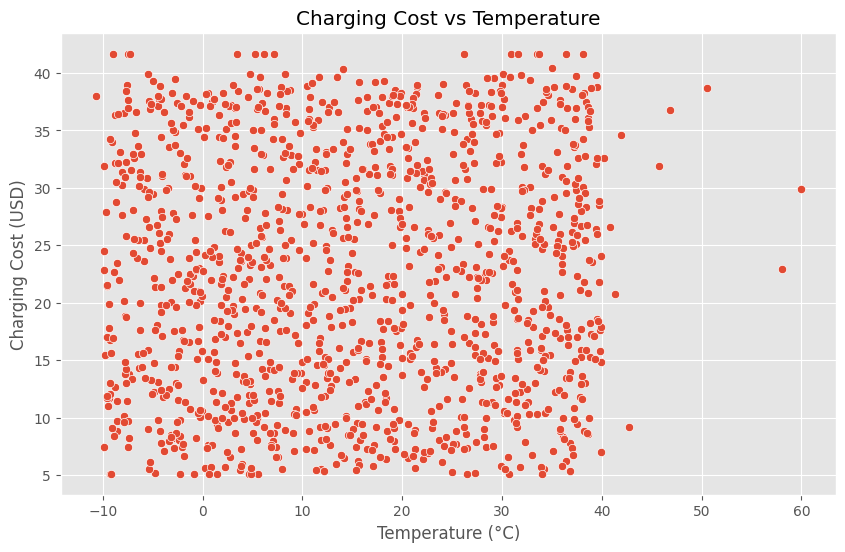

In [ ]:
# Calculate the correlation between temperature and charging cost
correlation = df[['Temperature (°C)', 'Charging Cost (USD)']].corr()

# Print the correlation coefficient
print("Correlation between Temperature and Charging Cost:", correlation.iloc[0, 1])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature (°C)', y='Charging Cost (USD)', data=df)
plt.title('Charging Cost vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Charging Cost (USD)')
plt.show()


Users who charge during off-peak hours (e.g., at night) spend less on charging.

In [ ]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x='Off-Peak Charging', y='Charging Cost (USD)', data=df, color='teal')
plt.title('Charging Cost for Off-Peak vs On-Peak Charging')
plt.xlabel('Off-Peak Charging (1 = Yes, 0 = No)')
plt.ylabel('Charging Cost (USD)')
plt.show()

Charging stations with higher charging rates (kW) lead to shorter charging durations.

In [ ]:
# Calculate the correlation between charging rate and charging duration
correlation = df[['Charging Rate (kW)', 'Charging Duration (hours)']].corr()

# Print the correlation coefficient
print("Correlation between Charging Rate and Charging Duration:", correlation.iloc[0, 1])

# Prescriptive recommendation: suggest users to use stations with higher charging rates for faster charging
high_rate_stations = df[df['Charging Rate (kW)'] > df['Charging Rate (kW)'].median()]

# Display the stations with higher charging rates
print("Stations with higher charging rates for faster charging:")


# Types of Analysis

Diagnosis Analysis

Distribution of Charging Costs and Durations

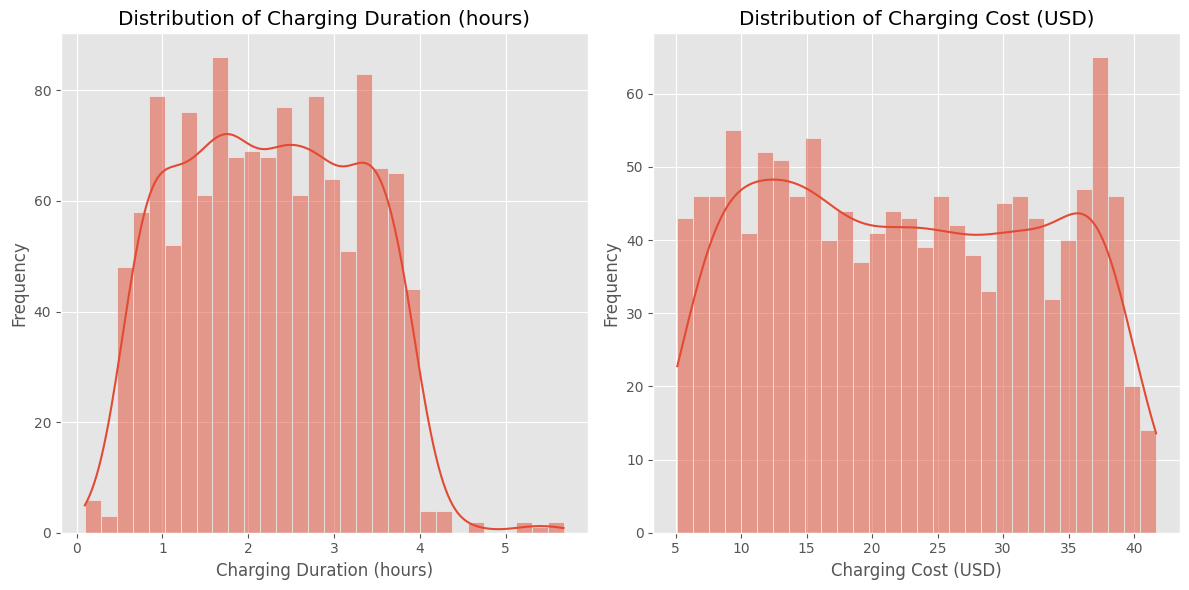

In [ ]:
# Plot the distribution of Charging Duration and Charging Cost
plt.figure(figsize=(12, 6))

# Subplot for Charging Duration
plt.subplot(1, 2, 1)
sns.histplot(df['Charging Duration (hours)'], bins=30, kde=True)
plt.title('Distribution of Charging Duration (hours)')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')

# Subplot for Charging Cost
plt.subplot(1, 2, 2)
sns.histplot(df['Charging Cost (USD)'], bins=30, kde=True)
plt.title('Distribution of Charging Cost (USD)')
plt.xlabel('Charging Cost (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Identifying Patterns in Charging Frequency

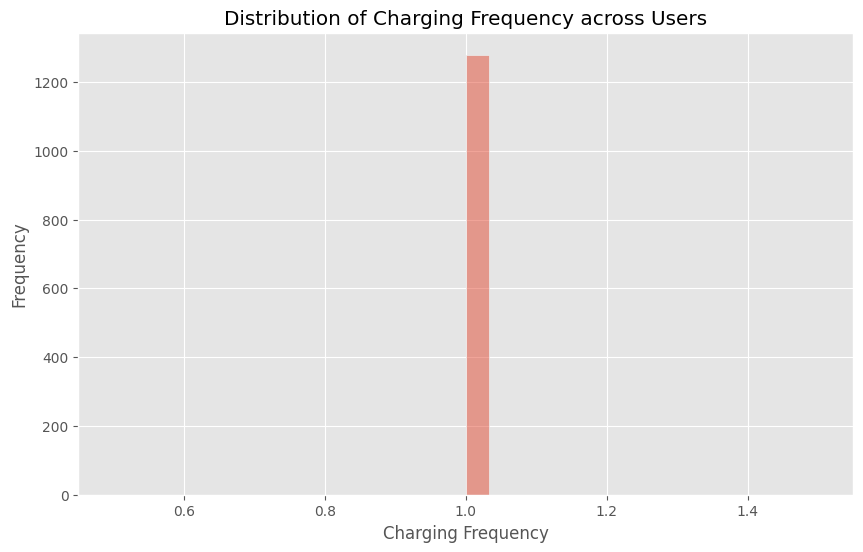

In [ ]:
# Calculate the charging frequency for each user
user_charging_frequency = df.groupby('User ID')['Charging Station ID'].count().reset_index()
user_charging_frequency.columns = ['User ID', 'Charging Frequency']

# Plot the distribution of Charging Frequency across users
plt.figure(figsize=(10, 6))
sns.histplot(user_charging_frequency['Charging Frequency'], bins=30, kde=True)
plt.title('Distribution of Charging Frequency across Users')
plt.xlabel('Charging Frequency')
plt.ylabel('Frequency')
plt.show()


Correlation Between Key Variables (Diagnostic of Relationships)

In [ ]:
# Calculate correlation matrix for numeric columns
correlation_matrix = df[['Charging Duration (hours)', 'Charging Cost (USD)', 'Charging Frequency']].corr()

# Display correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()


Diagnosing Anomalies in Charging Duration

In [ ]:
# Diagnose anomalies by identifying unusually short or long charging durations
short_charging = df[df['Charging Duration (hours)'] < 0.5]
long_charging = df[df['Charging Duration (hours)'] > 10]

print("Anomalous Short Charging Sessions:\n", short_charging)
print("Anomalous Long Charging Sessions:\n", long_charging)


Anomalous Short Charging Sessions:
       User ID  Vehicle Model  Battery Capacity (kWh)  Charging Station ID  \
243       482              1                   100.0                  415   
324       572              4                    75.0                  243   
456       718              2                    85.0                    1   
515       784              1                    85.0                   81   
576       851              3                    85.0                   65   
983      1303              3                    75.0                  182   
1030       37              2                   100.0                   93   
1081       93              1                    85.0                  106   
1243      273              3                    75.0                  392   
1261      293              4                    75.0                  215   

      Charging Station Location Charging Start Time   Charging End Time  \
243                           3 2024-01-1

Predictive Analysis

Categorical Data Comparison (User Type)

In [ ]:

# classification model (e.g., Logistic Regression, Decision Trees, etc.) to predict User Type and then compare predicted values to actual values.
# Define the features and target for prediction
features = ['Charging Duration (hours)', 'Battery Capacity (kWh)', 'Charging Rate (kW)', 'Charging Station Location']
X = df[features]
y = df['User Type']  # Assuming 'User Type' is a categorical variable (e.g., "Commuter" vs. "Long-Distance Traveler")

# Perform One-Hot Encoding for categorical columns
X = pd.get_dummies(X, columns=['Charging Station Location'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compare predicted vs actual User Type classifications
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for User Type Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Continuous Data Comparison (Charging Cost Prediction)

In [ ]:


# Define features and target for continuous prediction
features = ['Distance Driven (since last charge) (km)', 'Charging Duration (hours)', 'Battery Capacity (kWh)', 'State of Charge (Start %)']
X = df[features]
y = df['Charging Cost (USD)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Charging Cost (USD)')
plt.xlabel('Actual Charging Cost (USD)')
plt.ylabel('Predicted Charging Cost (USD)')
plt.show()


Temporal Data Comparison (Charging Start Time Prediction)

In [ ]:


# Convert 'Charging Start Time' to datetime if it's not already
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract features like hour of the day from Charging Start Time
df['Charging Hour'] = df['Charging Start Time'].dt.hour

# Predict charging duration based on hour of the day
X = df[['Charging Hour']]  # Features: Charging hour of the day
y = df['Charging Duration (hours)']  # Target: Charging Duration

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot Predicted vs Actual Charging Duration using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(X_test['Charging Hour'], y_test, label='Actual Charging Duration', alpha=0.6, width=0.4, align='center')
plt.bar(X_test['Charging Hour'], y_pred, label='Predicted Charging Duration', alpha=0.6, width=0.4, align='edge')
plt.title('Predicted vs Actual Charging Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Charging Duration (hours)')
plt.legend()
plt.show()


Predicting Charging Cost Based on Features

In [ ]:




# Feature Engineering: Extract day and hour from datetime if necessary
df['Charging Day'] = pd.to_datetime(df['Charging Start Time']).dt.day_name()
df['Charging Hour'] = pd.to_datetime(df['Charging Start Time']).dt.hour

# Select features and target
X = df[['Charging Duration (hours)', 'Charging Hour']]
y = df['Charging Cost (USD)']

# Convert categorical variables (like Charging Day) into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 148.2934063450652
R² Score: -0.32073823169048343


In [ ]:


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearch to the training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print(f"Best parameters: {grid_search.best_params_}")

# Train the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Best Model MSE: {best_mse}")
print(f"Best Model R²: {best_r2}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Model MSE: 122.40847977784762
Best Model R²: -0.09020059023746807


Correlation between Charging Hour and Charging Cost: 0.017044994179184845


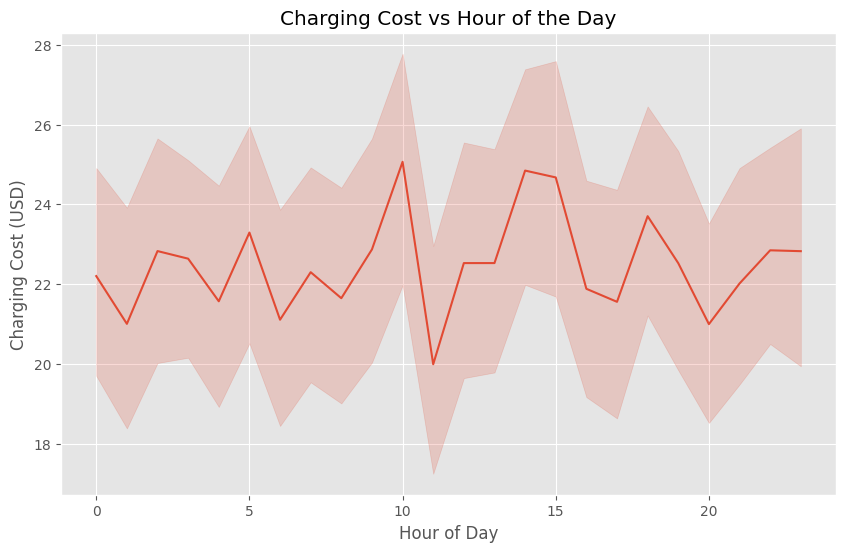

In [ ]:
#correlation Analysis
# Assuming df is the DataFrame containing the dataset
# Step 1: Convert 'Charging Start Time' to datetime format if it's not already
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Step 2: Extract the hour of the day from 'Charging Start Time'
df['Charging Hour'] = df['Charging Start Time'].dt.hour

# Step 3: Calculate the correlation between 'Charging Hour' and 'Charging Cost (USD)'
correlation = df[['Charging Hour', 'Charging Cost (USD)']].corr()

# Print the correlation coefficient
print("Correlation between Charging Hour and Charging Cost:", correlation.iloc[0, 1])

# Step 4: Visualize the relationship between charging hour and charging cost
plt.figure(figsize=(10, 6))
sns.lineplot(x='Charging Hour', y='Charging Cost (USD)', data=df)
plt.title('Charging Cost vs Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Charging Cost (USD)')
plt.grid(True)
plt.show()


Predicting Charging Behavior (Classification Problem)

In [ ]:
temp_df = df[['Charging Duration (hours)', 'Charging Hour',  'User ID', 'Charging Station ID']]

# Display the temporary dataframe
print(temp_df.head())  # Show the first few rows of the temp dataframe


   Charging Duration (hours)  Charging Hour  User ID  Charging Station ID
0                   0.591363              0        0                  301
1                   3.133652              1      432                  339
2                   2.452653              2      543                   83
3                   1.266431              3      654                  232
4                   2.019765              4      765                    9


In [ ]:
# Create target variable for peak hour charging (1 for peak, 0 otherwise)
temp_df['Peak Hour'] = temp_df['Charging Hour'].apply(lambda x: 1 if 17 <= x <= 21 else 0)

# Select features and target
X = temp_df[['Charging Duration (hours)', 'Charging Hour', 'Charging Day']]
y = temp_df['Peak Hour']

# Convert categorical variables (like Charging Day) into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)


In [ ]:


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report for precision, recall, F1-score
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy: 0.80859375
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       202
           1       0.56      0.46      0.51        54

    accuracy                           0.81       256
   macro avg       0.71      0.68      0.69       256
weighted avg       0.80      0.81      0.80       256



Prescriptive Analysis

Charging Cost Over Time of Day (Line Plot)


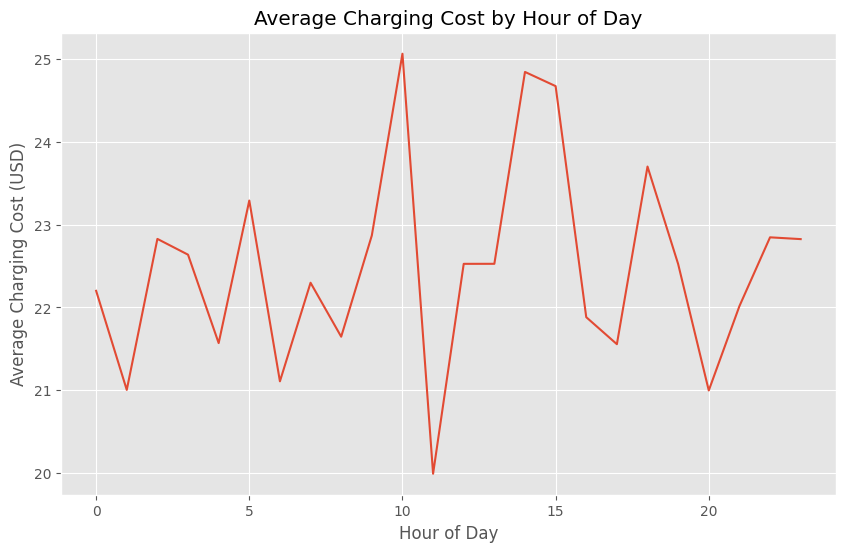

Recommended off-peak charging hours: [ 0  1  4  6  7  8 11 16 17 19 20 21]


In [ ]:
# Assuming 'df' is the dataframe containing the dataset

# Convert Charging Start Time to datetime if it's not already in that format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract the hour of the day from the charging start time
df['Charging Hour'] = df['Charging Start Time'].dt.hour

# Group by hour and calculate the average charging cost for each hour
charging_cost_by_hour = df.groupby('Charging Hour')['Charging Cost (USD)'].mean().reset_index()

# Plot the charging cost throughout the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='Charging Hour', y='Charging Cost (USD)', data=charging_cost_by_hour)
plt.title('Average Charging Cost by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Charging Cost (USD)')
plt.show()

# Suggest off-peak charging hours (for example, hours 0-6 and 22-23 could be off-peak)
off_peak_hours = charging_cost_by_hour[charging_cost_by_hour['Charging Cost (USD)'] < charging_cost_by_hour['Charging Cost (USD)'].median()]

print("Recommended off-peak charging hours:", off_peak_hours['Charging Hour'].values)


Reducing Charging Costs Based on Time of Day

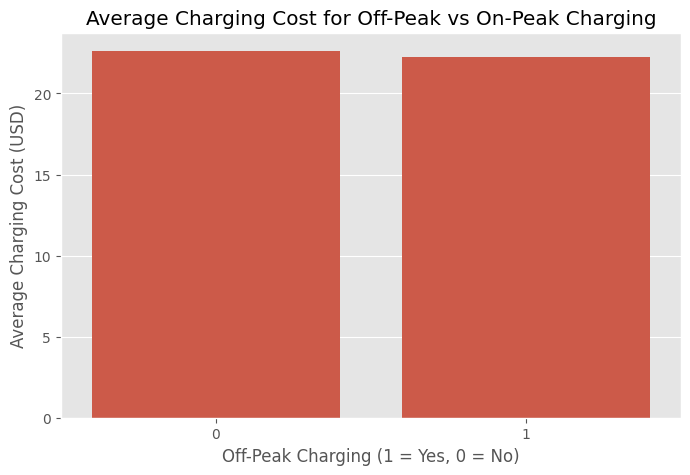

In [ ]:
# Comparative Analysis Create a column for off-peak hours (assuming off-peak is between 10 PM and 6 AM)
df['Off-Peak Charging'] = df['Charging Hour'].apply(lambda x: 1 if 22 <= x or x <= 6 else 0)

# Calculate the average charging cost for off-peak vs on-peak charging
avg_cost = df.groupby('Off-Peak Charging')['Charging Cost (USD)'].mean().reset_index()

# Plot the charging costs for off-peak and on-peak hours
plt.figure(figsize=(8, 5))
sns.barplot(x='Off-Peak Charging', y='Charging Cost (USD)', data=avg_cost)
plt.title('Average Charging Cost for Off-Peak vs On-Peak Charging')
plt.xlabel('Off-Peak Charging (1 = Yes, 0 = No)')
plt.ylabel('Average Charging Cost (USD)')
plt.show()


Reducing Charging Duration Based on Charging Rate

In [ ]:
# Calculate the correlation between charging rate and charging duration
correlation = df[['Charging Rate (kW)', 'Charging Duration (hours)']].corr()

# Print the correlation coefficient
print("Correlation between Charging Rate and Charging Duration:", correlation.iloc[0, 1])

# Prescriptive recommendation: suggest users to use stations with higher charging rates for faster charging
high_rate_stations = df[df['Charging Rate (kW)'] > df['Charging Rate (kW)'].median()]

# Display the stations with higher charging rates
print("Stations with higher charging rates for faster charging:")
print(high_rate_stations[['Charging Station ID', 'Charging Rate (kW)']].drop_duplicates())


Correlation between Charging Rate and Charging Duration: -0.01465435653172915
Stations with higher charging rates for faster charging:
      Charging Station ID  Charging Rate (kW)
0                     301           36.389181
1                     339           30.677735
2                      83           27.513593
3                     232           32.882870
6                      64           26.185188
...                   ...                 ...
1304                  299           42.337926
1306                  201           45.863832
1314                  260           63.216118
1317                  282           45.482066
1318                  242           38.148183

[608 rows x 2 columns]


Charging Cost Distribution by Day of the Week (Box Plot)

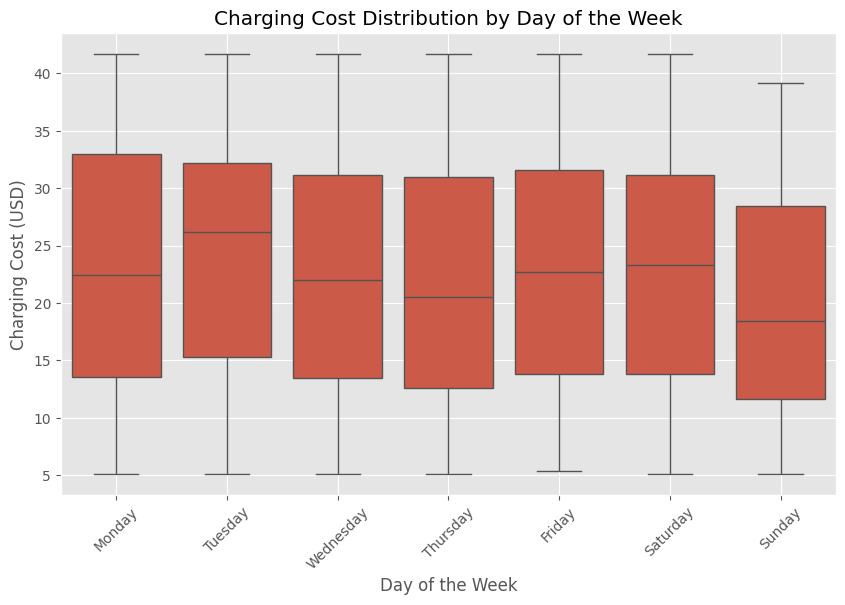

In [ ]:
# Extract day of the week
df['Charging Day'] = df['Charging Start Time'].dt.day_name()

# Boxplot for charging cost distribution across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Charging Day', y='Charging Cost (USD)', data=df)
plt.title('Charging Cost Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Charging Cost (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Charging Cost Distribution by User (Histogram)

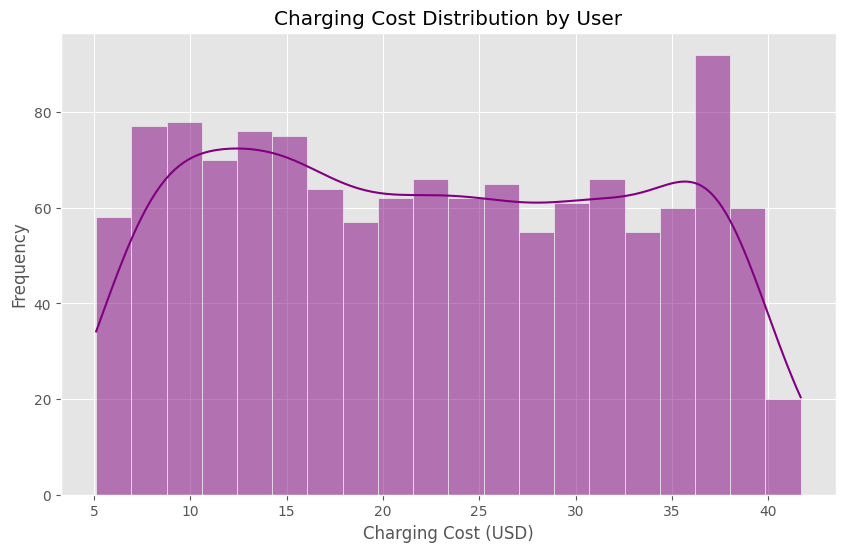

In [ ]:
# Histogram of charging costs by user
plt.figure(figsize=(10, 6))
sns.histplot(df['Charging Cost (USD)'], kde=True, bins=20, color='purple')
plt.title('Charging Cost Distribution by User')
plt.xlabel('Charging Cost (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Distance Driven vs. Charging Cost Analysis:



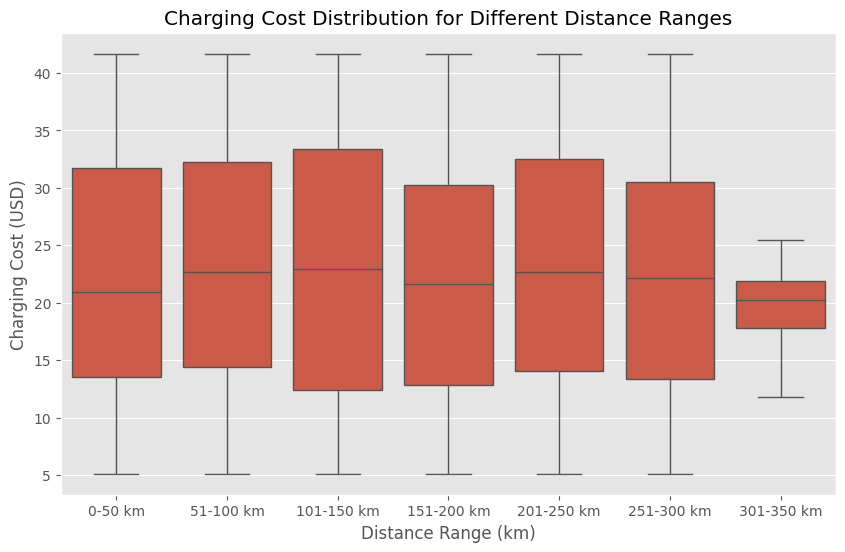

In [ ]:
# Define bins for distance (e.g., 0-50 km, 51-100 km, etc.)
bins = [0, 50, 100, 150, 200, 250, 300, 350]
labels = ['0-50 km', '51-100 km', '101-150 km', '151-200 km', '201-250 km', '251-300 km', '301-350 km']

# Create a new column for the distance bins
df['Distance Range'] = pd.cut(df['Distance Driven (since last charge) (km)'], bins=bins, labels=labels)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Distance Range', y='Charging Cost (USD)', data=df)
plt.title('Charging Cost Distribution for Different Distance Ranges')
plt.xlabel('Distance Range (km)')
plt.ylabel('Charging Cost (USD)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 9.272803724745923
Mean Squared Error: 112.24656042454606
Root Mean Squared Error: 10.594647725363314


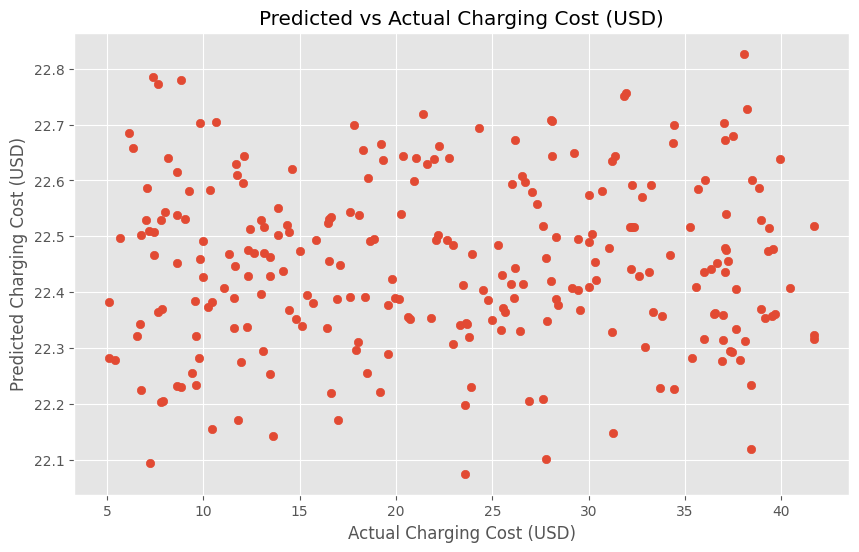

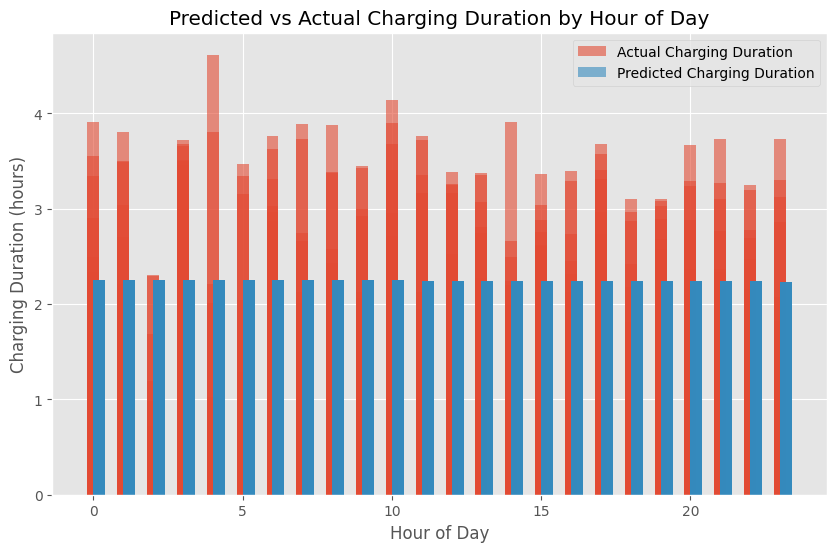

How does the time of day affect charging costs?

What factors affect charging duration for electric vehicles?

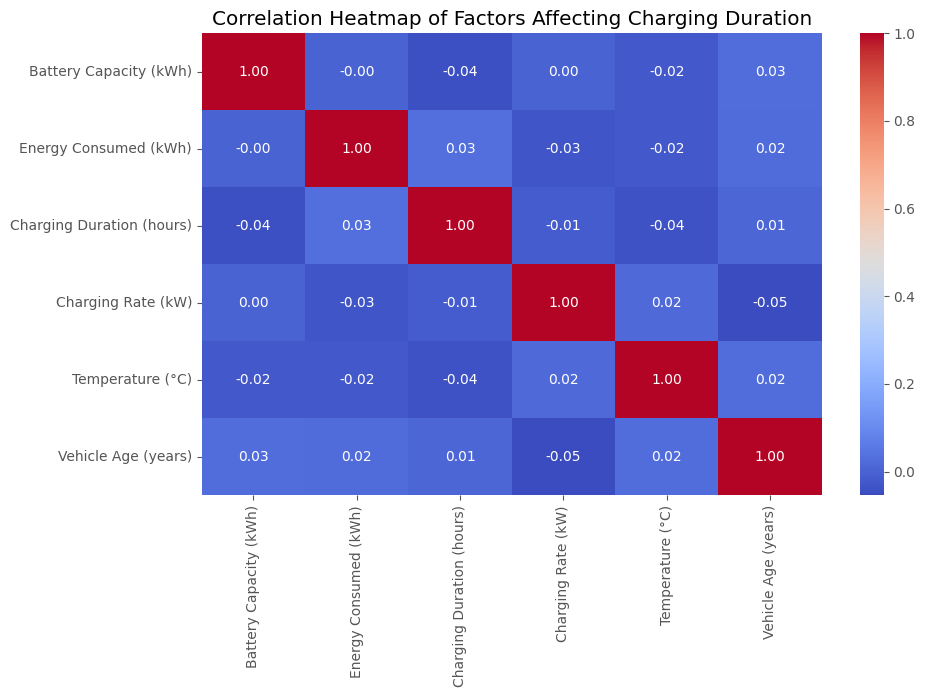

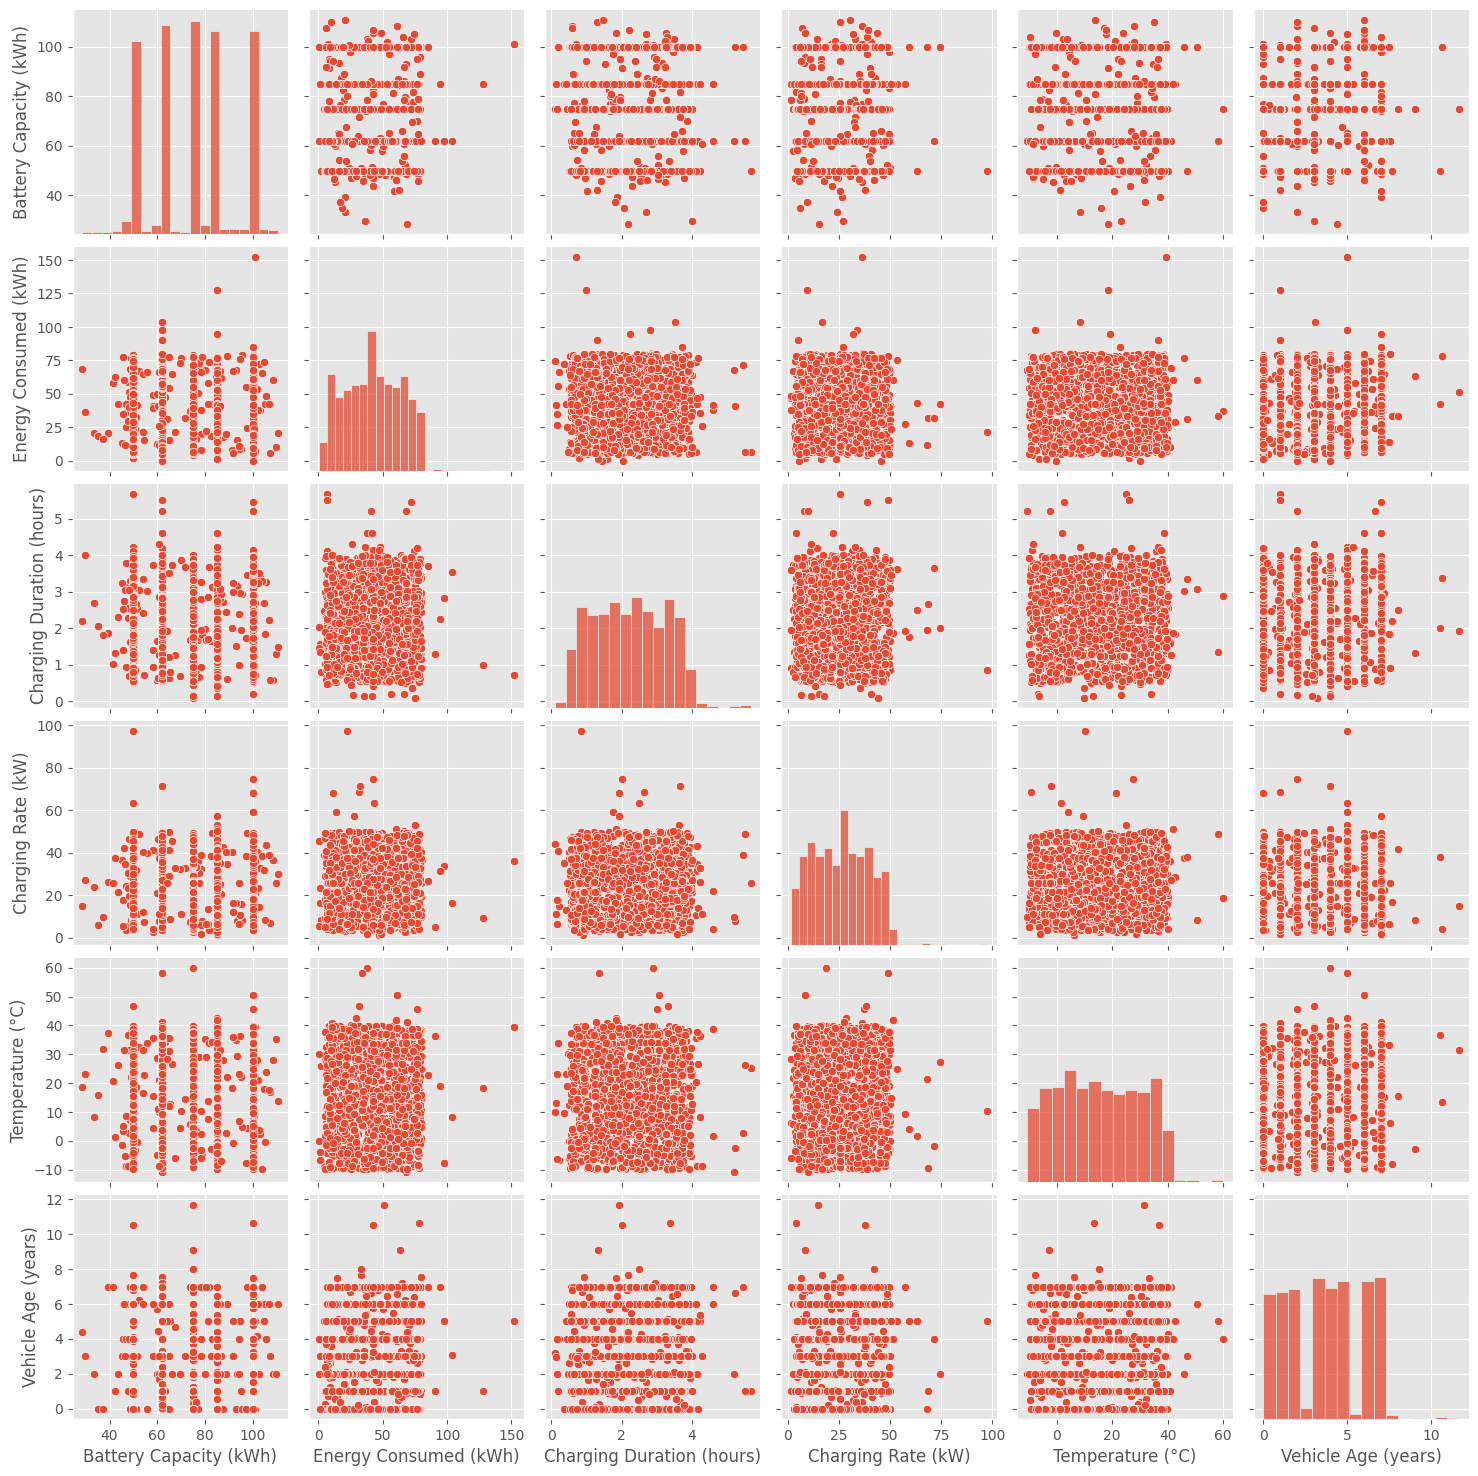

In [ ]:


# Correlation heatmap to identify relationships between continuous variables
correlation_matrix = df[['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Temperature (°C)', 'Vehicle Age (years)']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Factors Affecting Charging Duration')
plt.show()

# Pairplot to visualize relationships between different factors and charging duration
sns.pairplot(df[['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Temperature (°C)', 'Vehicle Age (years)']])
plt.show()


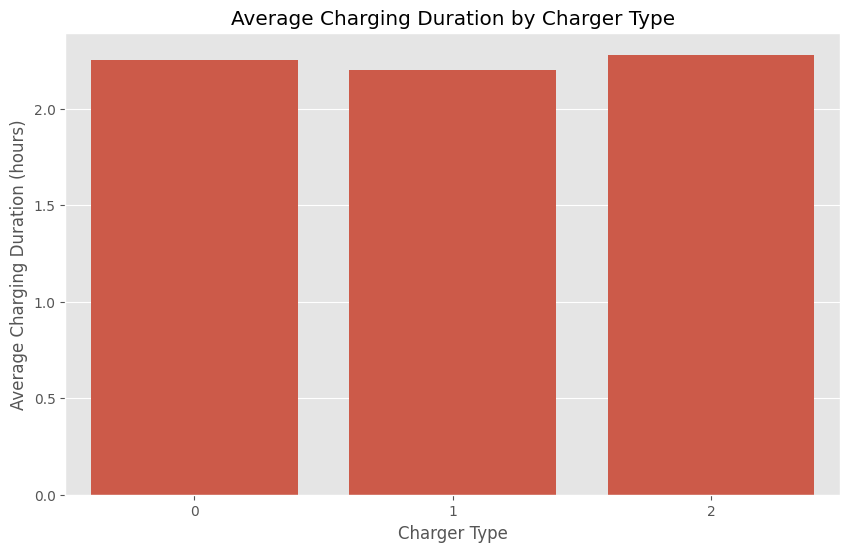

In [ ]:
#How does charging duration vary based on charger type?
# Group by Charger Type and calculate average charging duration
charging_duration_by_type = df.groupby('Charger Type')['Charging Duration (hours)'].mean().reset_index()

# Plot the charging duration by charger type
plt.figure(figsize=(10, 6))
sns.barplot(x='Charger Type', y='Charging Duration (hours)', data=charging_duration_by_type)
plt.title('Average Charging Duration by Charger Type')
plt.xlabel('Charger Type')
plt.ylabel('Average Charging Duration (hours)')
plt.show()


Correlation between Charging Rate and Charging Duration: -0.01465435653172915


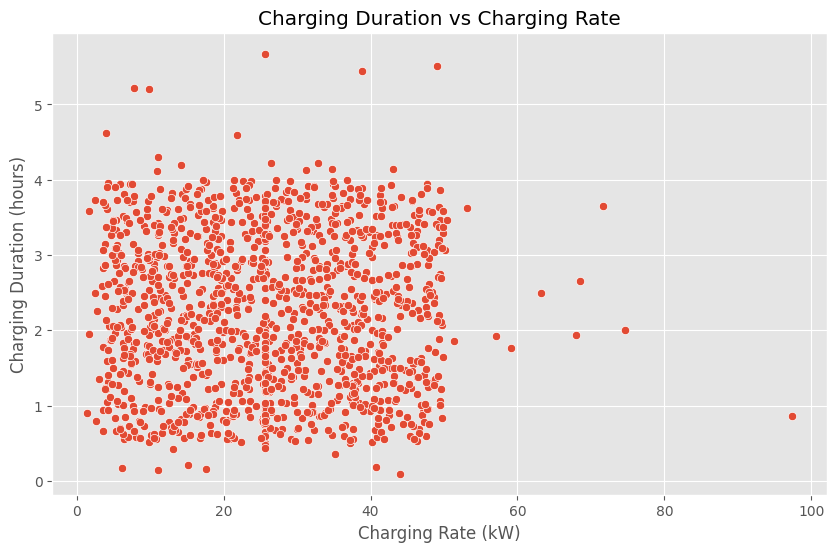

In [ ]:
# Calculate the correlation between charging rate and charging duration
correlation = df[['Charging Rate (kW)', 'Charging Duration (hours)']].corr()

# Print the correlation coefficient
print("Correlation between Charging Rate and Charging Duration:", correlation.iloc[0, 1])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Rate (kW)', y='Charging Duration (hours)', data=df)
plt.title('Charging Duration vs Charging Rate')
plt.xlabel('Charging Rate (kW)')
plt.ylabel('Charging Duration (hours)')
plt.show()


5. What is the relationship between vehicle age and charging duration?

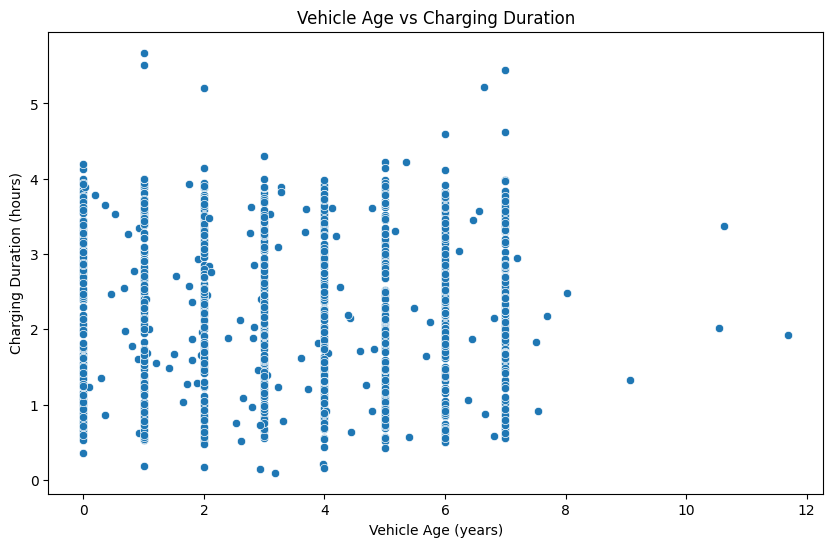

Correlation between Vehicle Age and Charging Duration: 0.01


In [ ]:
# Scatter plot of Vehicle Age vs Charging Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vehicle Age (years)', y='Charging Duration (hours)', data=df)
plt.title('Vehicle Age vs Charging Duration')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Charging Duration (hours)')
plt.show()

# Correlation between vehicle age and charging duration
correlation = df['Vehicle Age (years)'].corr(df['Charging Duration (hours)'])
print(f"Correlation between Vehicle Age and Charging Duration: {correlation:.2f}")


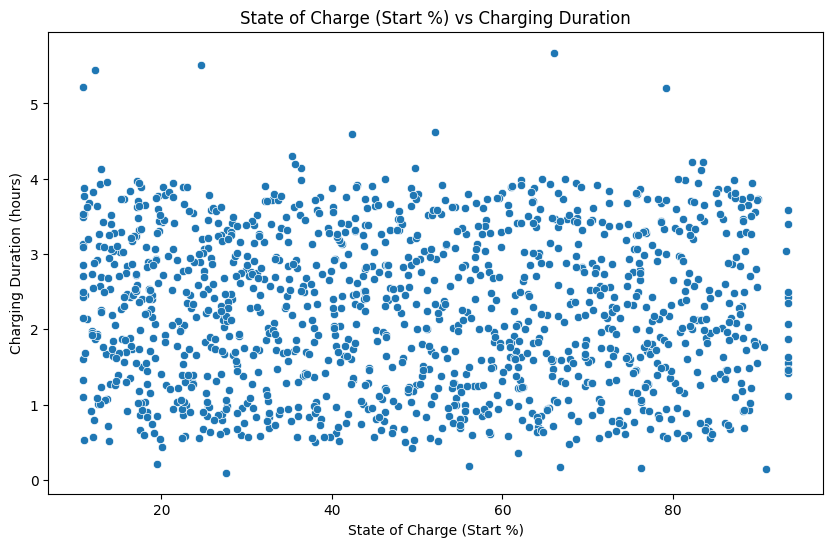

Correlation between SOC at start and Charging Duration: -0.02


In [ ]:
# Scatter plot of State of Charge (Start %) vs Charging Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='State of Charge (Start %)', y='Charging Duration (hours)', data=df)
plt.title('State of Charge (Start %) vs Charging Duration')
plt.xlabel('State of Charge (Start %)')
plt.ylabel('Charging Duration (hours)')
plt.show()

# Correlation between SOC and charging duration
correlation = df['State of Charge (Start %)'].corr(df['Charging Duration (hours)'])
print(f"Correlation between SOC at start and Charging Duration: {correlation:.2f}")


           User ID  Vehicle Model  Battery Capacity (kWh)  \
count  1279.000000    1279.000000             1279.000000   
mean    655.948397       2.040657               74.369362   
min       0.000000       0.000000               28.592176   
25%     325.500000       1.000000               62.000000   
50%     653.000000       2.000000               75.000000   
75%     985.500000       3.000000               85.000000   
max    1318.000000       4.000000              110.658128   
std     380.519214       1.419153               17.692010   

       Charging Station ID  Charging Station Location  \
count          1279.000000                1279.000000   
mean            227.827991                   2.035966   
min               0.000000                   0.000000   
25%             107.000000                   1.000000   
50%             228.000000                   2.000000   
75%             345.000000                   3.000000   
max             461.000000                   4.0000

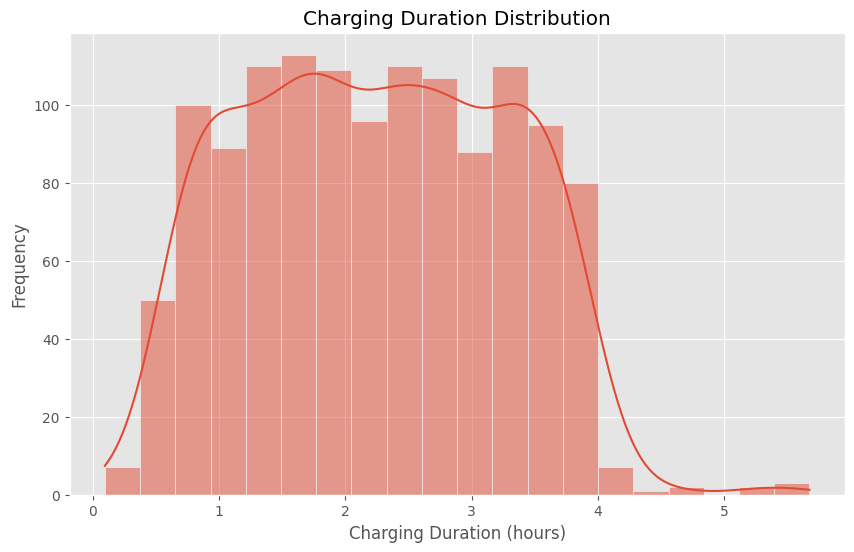

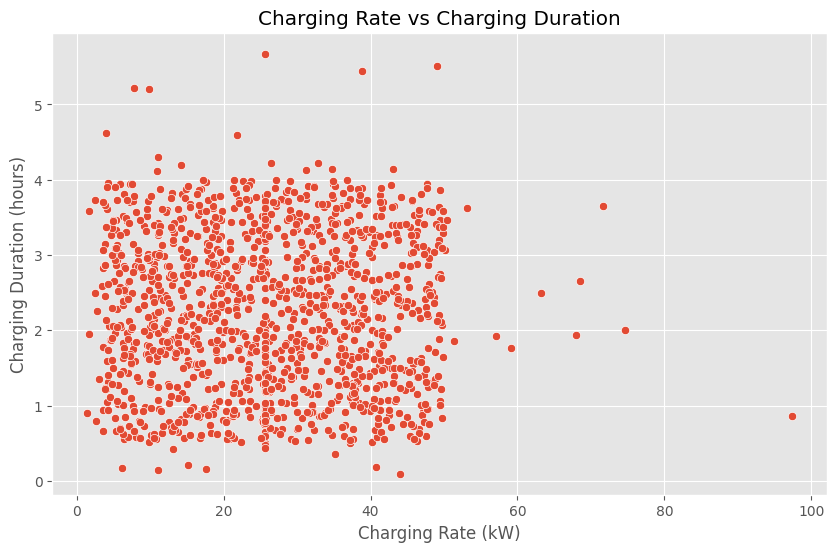

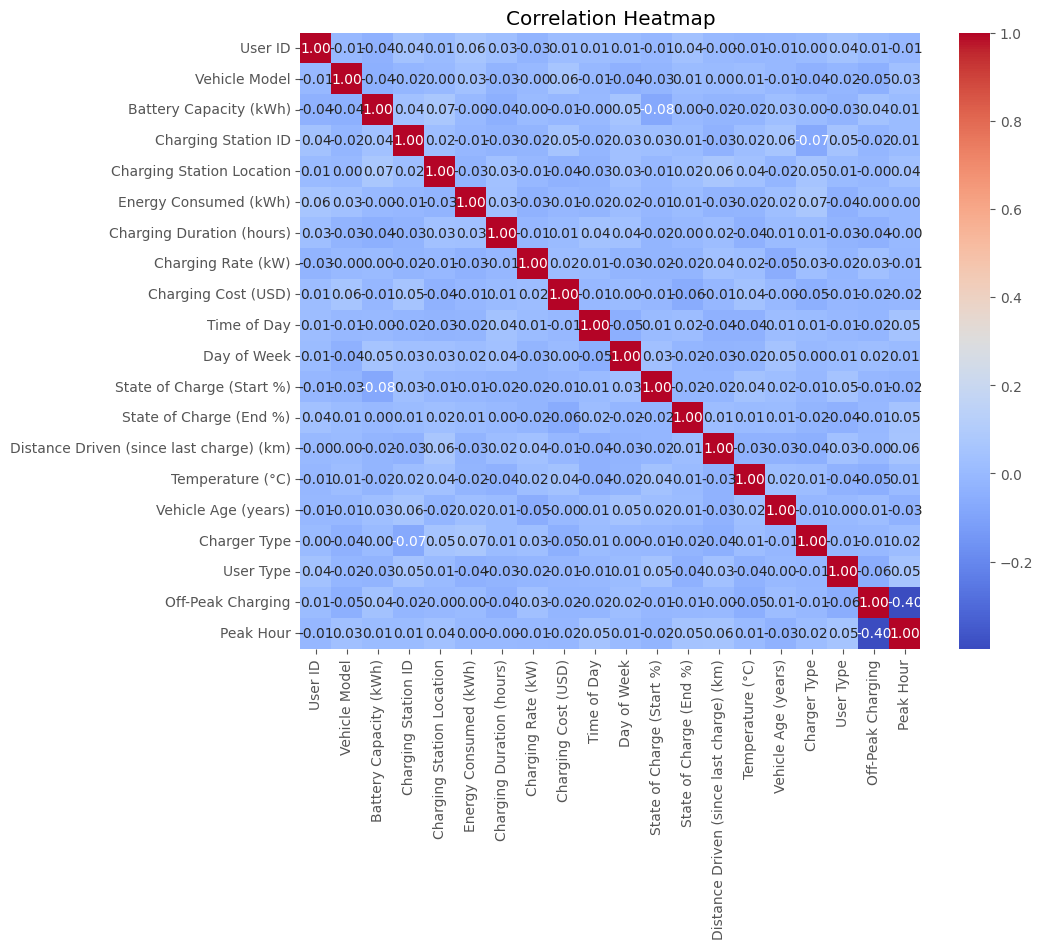

In [ ]:
# Descriptive statistics table
descriptive_stats = df.describe()
print(descriptive_stats)

# Frequency table for a categorical variable
frequency_table = df['Charger Type'].value_counts()
print(frequency_table)

# Histogram for charging duration
plt.figure(figsize=(10, 6))
sns.histplot(df['Charging Duration (hours)'], bins=20, kde=True)
plt.title('Charging Duration Distribution')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to see relationship between charging rate and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Rate (kW)', y='Charging Duration (hours)', data=df)
plt.title('Charging Rate vs Charging Duration')
plt.xlabel('Charging Rate (kW)')
plt.ylabel('Charging Duration (hours)')
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


bias

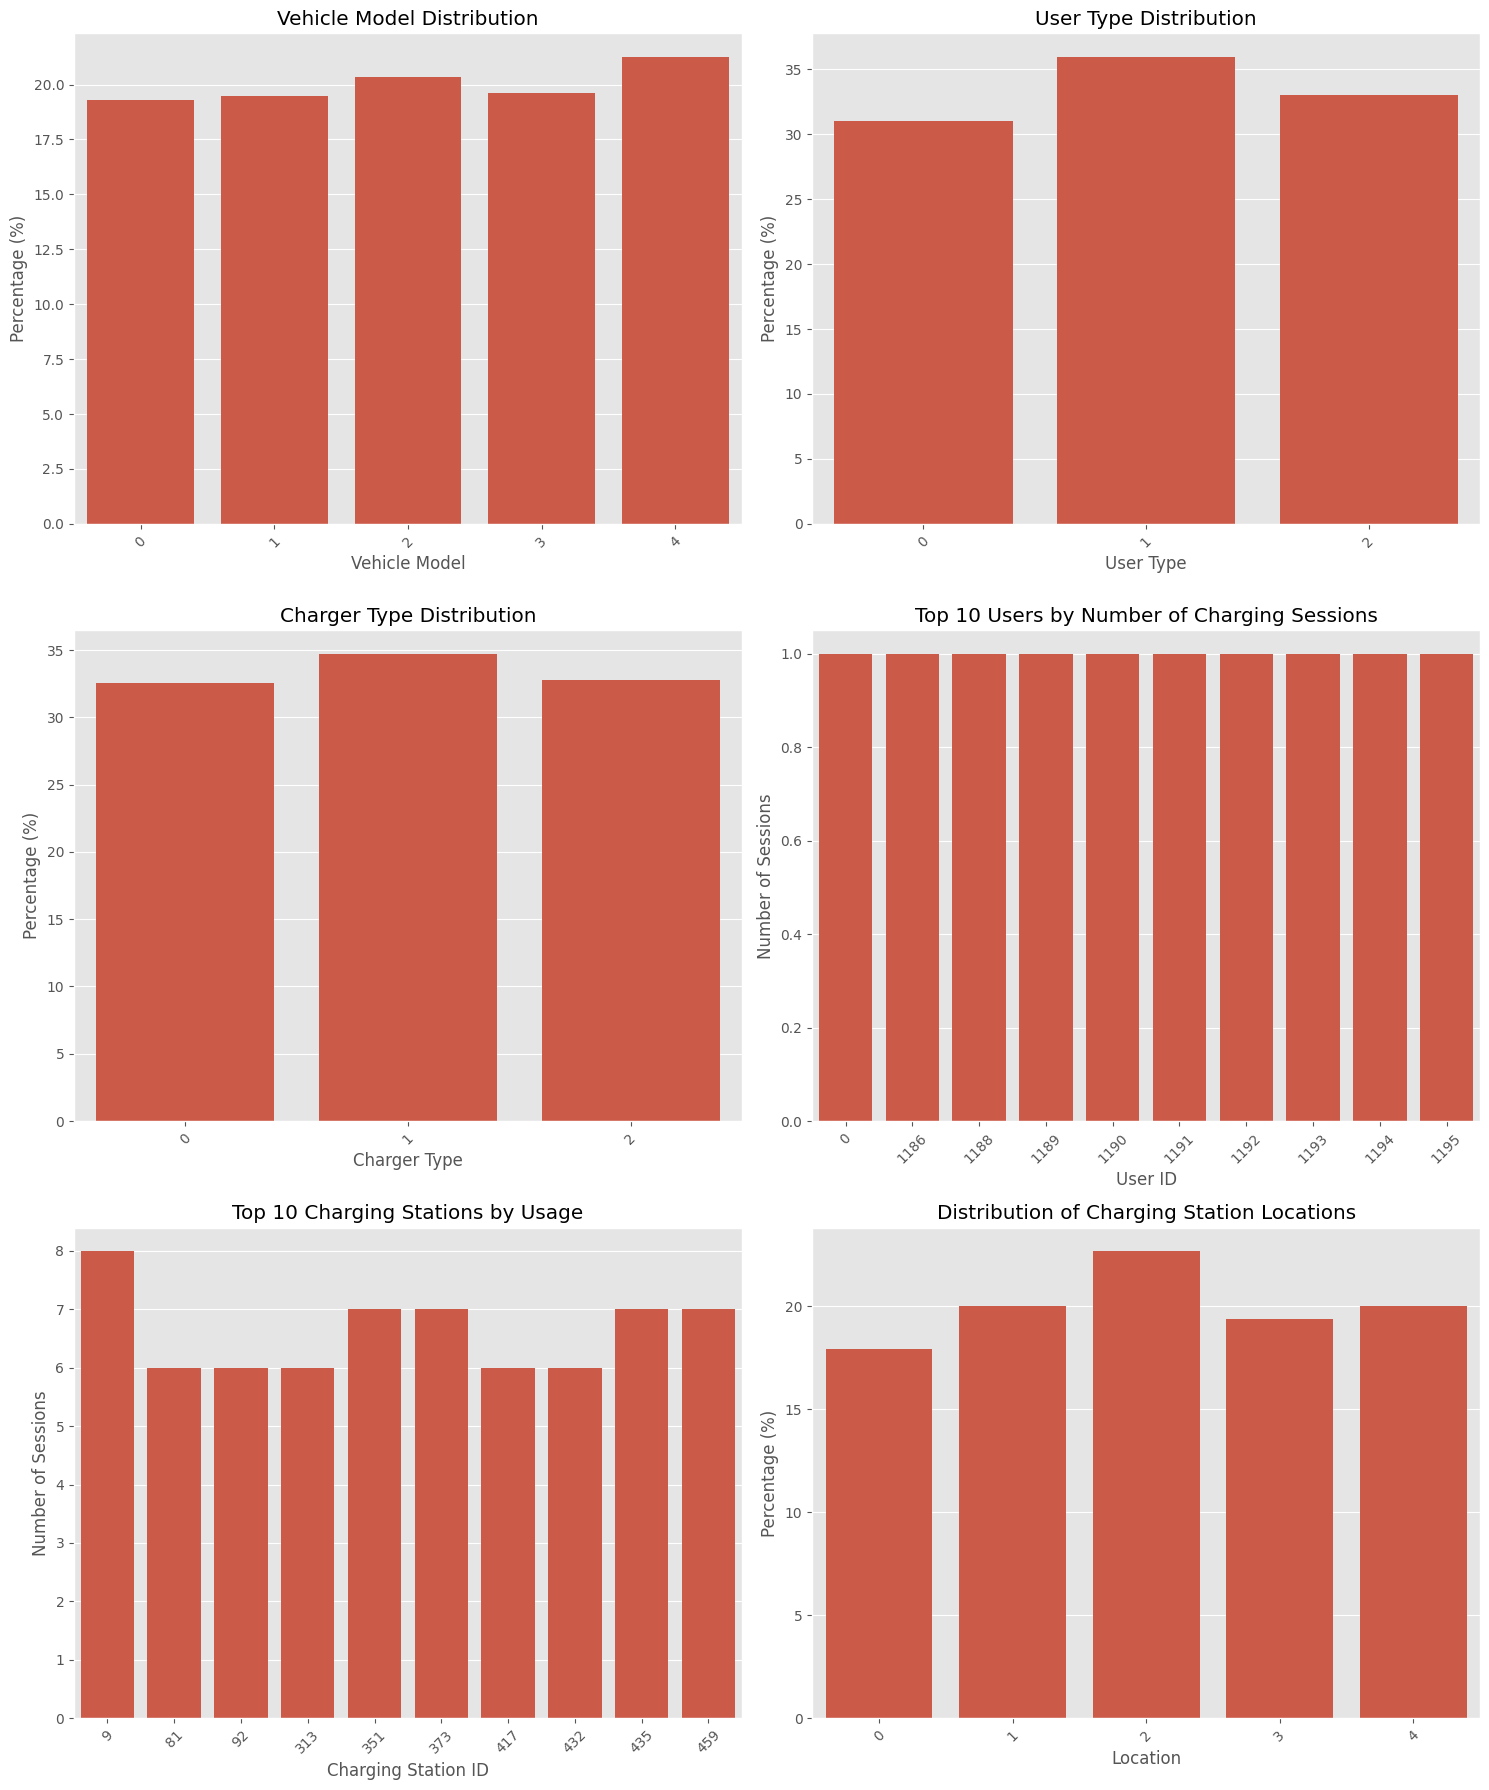

In [ ]:


# Example DataFrame (replace this with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Convert 'Charging Start Time' to datetime if not already done
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Plot settings
plt.style.use('ggplot')
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

# 1. Vehicle Model Distribution
vehicle_model_dist = df['Vehicle Model'].value_counts(normalize=True) * 100
sns.barplot(x=vehicle_model_dist.index, y=vehicle_model_dist.values, ax=axes[0])
axes[0].set_title('Vehicle Model Distribution')
axes[0].set_xlabel('Vehicle Model')
axes[0].set_ylabel('Percentage (%)')
axes[0].tick_params(axis='x', rotation=45)

# 2. User Type Distribution
user_type_dist = df['User Type'].value_counts(normalize=True) * 100
sns.barplot(x=user_type_dist.index, y=user_type_dist.values, ax=axes[1])
axes[1].set_title('User Type Distribution')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)

# 3. Charger Type Distribution
charger_type_dist = df['Charger Type'].value_counts(normalize=True) * 100
sns.barplot(x=charger_type_dist.index, y=charger_type_dist.values, ax=axes[2])
axes[2].set_title('Charger Type Distribution')
axes[2].set_xlabel('Charger Type')
axes[2].set_ylabel('Percentage (%)')
axes[2].tick_params(axis='x', rotation=45)

# 4. Top Users by Number of Charging Sessions
user_counts = df['User ID'].value_counts().head(10)
sns.barplot(x=user_counts.index, y=user_counts.values, ax=axes[3])
axes[3].set_title('Top 10 Users by Number of Charging Sessions')
axes[3].set_xlabel('User ID')
axes[3].set_ylabel('Number of Sessions')
axes[3].tick_params(axis='x', rotation=45)

# 5. Top Charging Stations by Usage
station_counts = df['Charging Station ID'].value_counts().head(10)
sns.barplot(x=station_counts.index, y=station_counts.values, ax=axes[4])
axes[4].set_title('Top 10 Charging Stations by Usage')
axes[4].set_xlabel('Charging Station ID')
axes[4].set_ylabel('Number of Sessions')
axes[4].tick_params(axis='x', rotation=45)

# 6. Charging Station Location Distribution
location_dist = df['Charging Station Location'].value_counts(normalize=True) * 100
sns.barplot(x=location_dist.index, y=location_dist.values, ax=axes[5])
axes[5].set_title('Distribution of Charging Station Locations')
axes[5].set_xlabel('Location')
axes[5].set_ylabel('Percentage (%)')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


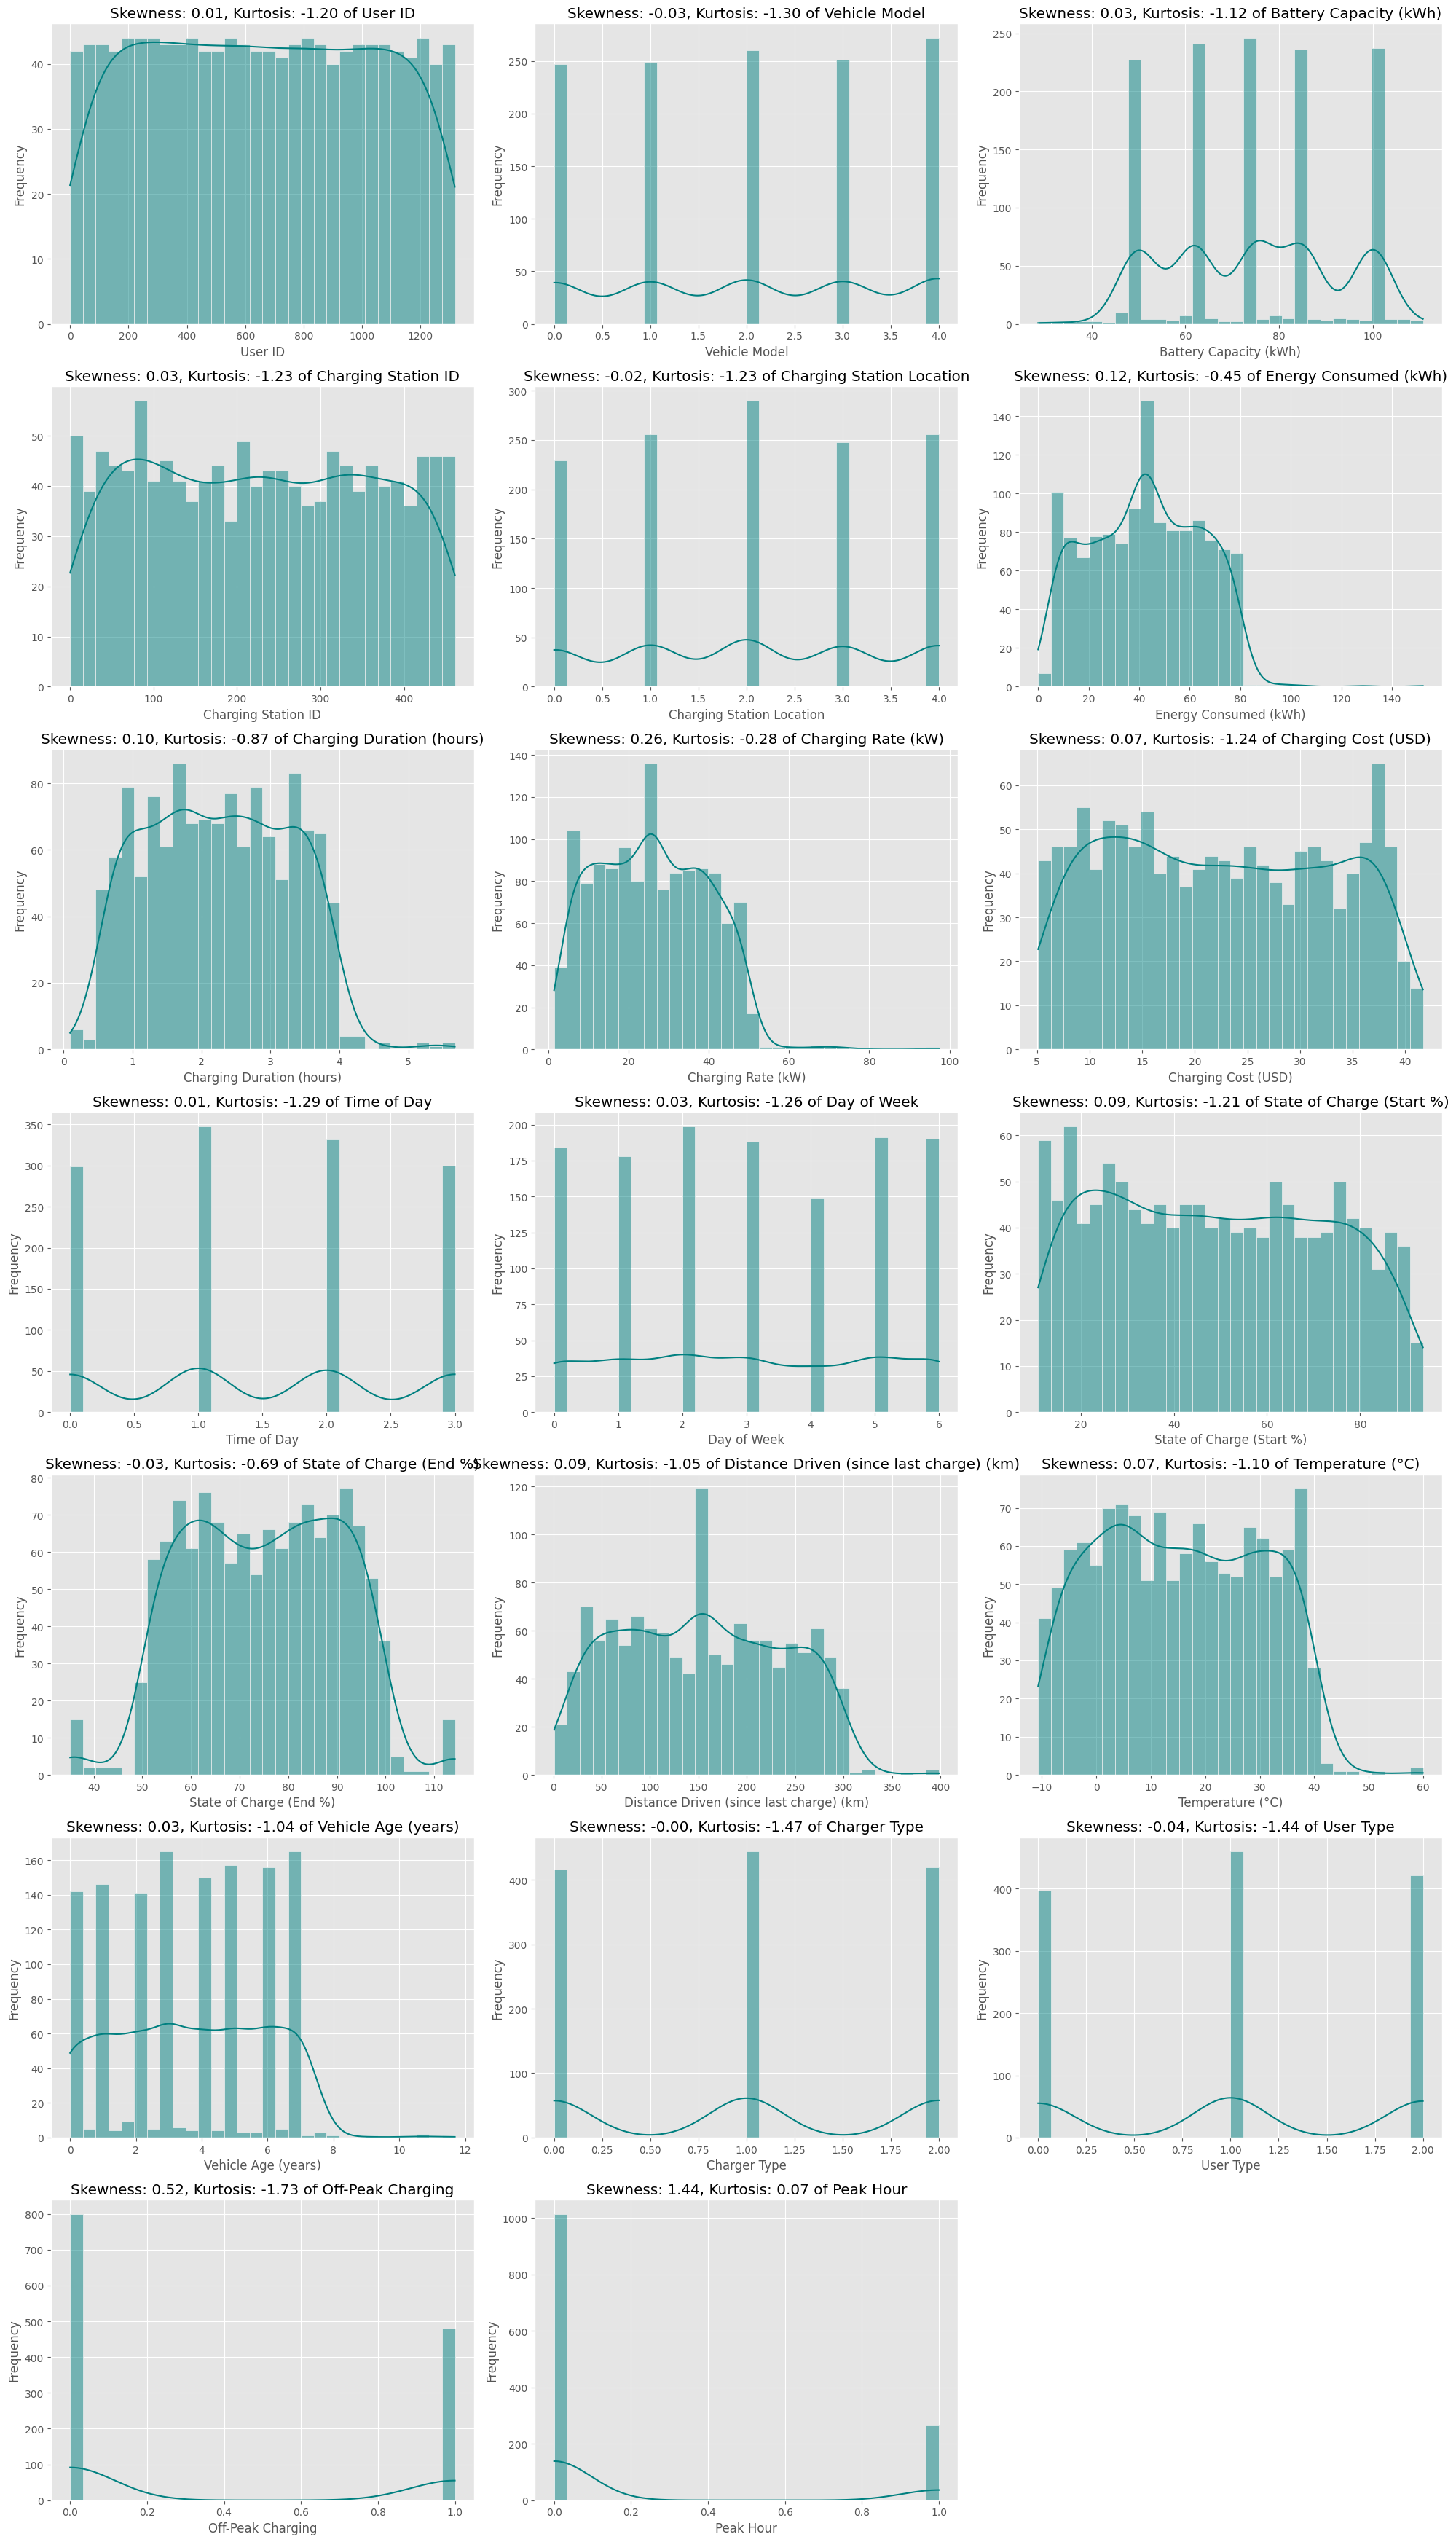

In [ ]:


# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # Calculate the number of rows needed

plt.figure(figsize=(20, num_rows * 5))  # Adjust figure size based on number of rows
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Create subplots with dynamic grid size
    sns.histplot(df[column], kde=True, color='teal', bins=30)

    # Calculate skewness and kurtosis
    skew_value = stats.skew(df[column], nan_policy='omit')
    kurt_value = stats.kurtosis(df[column], nan_policy='omit')

    # Add both skewness and kurtosis in the title
    plt.title(f'Skewness: {skew_value:.2f}, Kurtosis: {kurt_value:.2f} of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


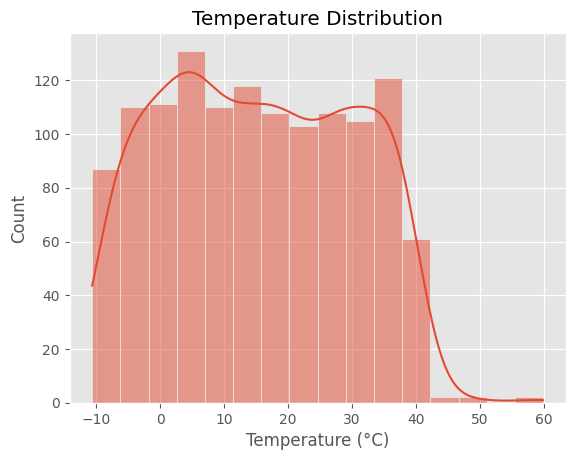

In [ ]:
sns.histplot(df['Temperature (°C)'], kde=True)
plt.title('Temperature Distribution')
plt.show()


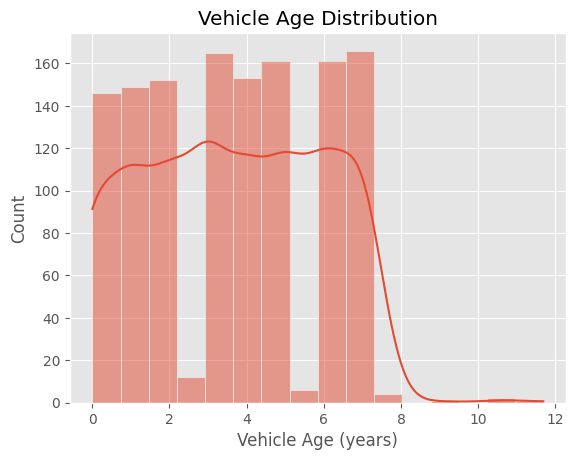

In [ ]:
sns.histplot(df['Vehicle Age (years)'], kde=True)
plt.title('Vehicle Age Distribution')
plt.show()
